# 데이터 불러오기

In [1]:
### 필요한 라이브러리 임폴트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from keras.optimizers import Adam
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
plt.rc('font', family='NanumBarunGothic')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/KDT/본 프로젝트'

Mounted at /content/drive
/content/drive/MyDrive/KDT/본 프로젝트


In [5]:
### pandas read_csv()함수를 이용, 데이터 셋 생성하기
df = pd.read_csv('0727_Seoul_preprocessed.csv', encoding = 'cp949', index_col=0)

# 결과 확인
print(df.head())
print('='*100)
print(df.tail())
print('='*100)
print(df.info())

   기준_년_코드  기준_분기_코드   자치구    행정동  대분류    상권_코드    중분류         업종명  총_점포수  \
0     2022         1  서대문구  북가좌2동  서비스  2110499     의료         한의원      1   
1     2022         1   노원구   공릉1동   소매  2110433  의류/잡화          안경      1   
2     2022         1   마포구   성산1동   소매  2110548   전자기기  컴퓨터및주변장치판매      4   
3     2022         1   은평구    대조동  서비스  2110481     미용       피부관리실      3   
4     2022         1  영등포구   신길6동  서비스  2110804     교육        예술학원      5   

   점포_수  ...  개업_점포_수  폐업_률  폐업_점포_수  프랜차이즈_점포_수   총_매출_금액  분기당_매출_금액  \
0     1  ...        0     0        0           0  54003138   54003138   
1     1  ...        0     0        0           0  16150022   16150022   
2     4  ...        0     0        0           0  89813767   89813767   
3     3  ...        1     0        0           0   4619842    4619842   
4     5  ...        0     0        0           0   5946480    5946480   

   주중_매출_금액  주말_매출_금액  남성_매출_금액  여성_매출_금액  
0  35504845  18498293   8791373  45211765  
1  1467465

In [6]:
# 이런저런 전처리

# 컬럼명 바꾸기
df = df.rename(columns = {'남성_매출_금액' : '남성매출금액',
                          '여성_매출_금액' : '여성매출금액',
                          '점포_수' : '점포수',
                          '총_점포수' : '총 점포수',
                          '개업_점포_수' : '개업점포수',
                          '폐업_점포_수' : '폐업점포수',
                          '프랜차이즈_점포_수' : '프랜차이즈 수',
                          '개업_율' : '개업률',
                          '폐업_률' : '폐업률'})

# df에 분기, 상반기/하반기 추가
df['분기'] = df['기준_년_코드'].astype(str) + '-' + df['기준_분기_코드'].astype(str)
df['반기'] = df['기준_분기_코드'].map({1:'상반기', 2:'상반기', 3:'하반기', 4:'하반기'})
df['반기'] = df['기준_년_코드'].astype(str) + ' ' + df['반기']

df.columns

Index(['기준_년_코드', '기준_분기_코드', '자치구', '행정동', '대분류', '상권_코드', '중분류', '업종명',
       '총 점포수', '점포수', '순점포증감률', '개업률', '개업점포수', '폐업률', '폐업점포수', '프랜차이즈 수',
       '총_매출_금액', '분기당_매출_금액', '주중_매출_금액', '주말_매출_금액', '남성매출금액', '여성매출금액',
       '분기', '반기'],
      dtype='object')

In [7]:
# 분기별 내림차순 정렬
df = df.sort_values(by=['기준_년_코드', '기준_분기_코드'], ascending=True).reset_index().drop('index', axis=1)
# df

In [8]:
# 압구정동만 남김
df_ap = df[df.행정동=='압구정동'].reset_index().drop('index', axis=1)

# df_ap

In [9]:
# 분기별 업종별 매출금액 합치기

df_ap_quarter = df_ap.groupby(['분기', '대분류', '중분류', '업종명', '행정동'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()

# 신발

In [10]:
# 신발만 남기기
ap_shoe = df_ap_quarter[df_ap_quarter.업종명 == '신발'].reset_index().drop('index', axis=1)
ap_shoe

,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수
0,2017-1,소매,의류/잡화,신발,압구정동,4417438692,62,2,2
1,2017-2,소매,의류/잡화,신발,압구정동,3859760196,59,2,3
2,2017-3,소매,의류/잡화,신발,압구정동,3775909746,59,0,0
3,2017-4,소매,의류/잡화,신발,압구정동,3602383201,58,0,1
4,2018-1,소매,의류/잡화,신발,압구정동,3243824976,54,0,0
5,2018-2,소매,의류/잡화,신발,압구정동,3653877872,54,1,1
6,2018-3,소매,의류/잡화,신발,압구정동,2659745597,55,1,0
7,2018-4,소매,의류/잡화,신발,압구정동,3516380090,54,1,2
8,2019-1,소매,의류/잡화,신발,압구정동,2011709157,42,0,2
9,2019-2,소매,의류/잡화,신발,압구정동,2795131744,41,0,1


## 지표 만들기 : 성장성, 순점포증감률, 시장성

In [12]:
# 기초구역 단위별 선택 업종의 전분기 대비 당기의 매출 증감률을 비교하여 성장 정도를 판단
# 성장성 = 당기 매출액 / 전분기 매출액

# 성장성 추가
# shift() 사용. 참고 : https://seong6496.tistory.com/216

ap_shoe['성장성'] = ap_shoe['분기당_매출_금액'] / ap_shoe['분기당_매출_금액'].shift(1)
# 성장성이 1 이하면 지난분기 대비 이번분기 매출이 줄어든 것. 1 이상이어야 해당 분기 매출 상승.


# # 17년도 1분기 성장성 값은 1로 임의로 정한다. 구할 수가 없어서...
ap_shoe['성장성'][0] = 1

ap_shoe

<ipython-input-12-50d977e26148>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_shoe['성장성'][0] = 1


,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수,성장성
0,2017-1,소매,의류/잡화,신발,압구정동,4417438692,62,2,2,1.000000
1,2017-2,소매,의류/잡화,신발,압구정동,3859760196,59,2,3,0.873755
2,2017-3,소매,의류/잡화,신발,압구정동,3775909746,59,0,0,0.978276
3,2017-4,소매,의류/잡화,신발,압구정동,3602383201,58,0,1,0.954044
4,2018-1,소매,의류/잡화,신발,압구정동,3243824976,54,0,0,0.900466
5,2018-2,소매,의류/잡화,신발,압구정동,3653877872,54,1,1,1.126410
6,2018-3,소매,의류/잡화,신발,압구정동,2659745597,55,1,0,0.727924
7,2018-4,소매,의류/잡화,신발,압구정동,3516380090,54,1,2,1.322074
8,2019-1,소매,의류/잡화,신발,압구정동,2011709157,42,0,2,0.572097
9,2019-2,소매,의류/잡화,신발,압구정동,2795131744,41,0,1,1.389431


In [13]:
# 개업률, 폐업률, 순점포증감률 추가

ap_shoe['개업률'] = (ap_shoe['개업점포수'] / ap_shoe['총 점포수']) * 100
ap_shoe['폐업률'] = (ap_shoe['폐업점포수'] / ap_shoe['총 점포수']) * 100
ap_shoe['순점포증감률'] = ((ap_shoe['개업점포수'] - ap_shoe['폐업점포수']) / ap_shoe['총 점포수']) * 100

ap_shoe

,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수,성장성,개업률,폐업률,순점포증감률
0,2017-1,소매,의류/잡화,신발,압구정동,4417438692,62,2,2,1.000000,3.225806,3.225806,0.000000
1,2017-2,소매,의류/잡화,신발,압구정동,3859760196,59,2,3,0.873755,3.389831,5.084746,-1.694915
2,2017-3,소매,의류/잡화,신발,압구정동,3775909746,59,0,0,0.978276,0.000000,0.000000,0.000000
3,2017-4,소매,의류/잡화,신발,압구정동,3602383201,58,0,1,0.954044,0.000000,1.724138,-1.724138
4,2018-1,소매,의류/잡화,신발,압구정동,3243824976,54,0,0,0.900466,0.000000,0.000000,0.000000
5,2018-2,소매,의류/잡화,신발,압구정동,3653877872,54,1,1,1.126410,1.851852,1.851852,0.000000
6,2018-3,소매,의류/잡화,신발,압구정동,2659745597,55,1,0,0.727924,1.818182,0.000000,1.818182
7,2018-4,소매,의류/잡화,신발,압구정동,3516380090,54,1,2,1.322074,1.851852,3.703704,-1.851852
8,2019-1,소매,의류/잡화,신발,압구정동,2011709157,42,0,2,0.572097,0.000000,4.761905,-4.761905
9,2019-2,소매,의류/잡화,신발,압구정동,2795131744,41,0,1,1.389431,0.000000,2.439024,-2.439024


In [14]:
# 시장성 추가
# 기초구역 단위별 점포당 평균 매출을 시군구의 평균 매출과 비교하여 시군구 평균 대비 시장성을 판단
# 시장성 = (행정동 내 분기 매출액 / 분기 점포수) - (자치구 내 분기 매출액 / 분기 점포수)



################################################################################################################################################################################################

# 자치구 평균 매출을 구하기 위해, 원본 데이터로 잠깐 작업하겠습니다
df_gangnam = df[df['자치구'] == '강남구']

# 자치구 분기별 업종별 매출금액 합치기
df_gangnam_quarter = df_gangnam.groupby(['분기', '자치구', '대분류', '중분류', '업종명'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()

# 신발만 남기기
gangnam_shoe = df_gangnam_quarter[df_gangnam_quarter['업종명'] == '신발'].reset_index()

################################################################################################################################################################################################

ap_shoe['시장성'] = (ap_shoe['분기당_매출_금액'] / ap_shoe['총 점포수']) - (gangnam_shoe['분기당_매출_금액'] / gangnam_shoe['총 점포수'])

ap_shoe = ap_shoe[['분기', '업종명','분기당_매출_금액', '성장성', '순점포증감률', '시장성']]
ap_shoe

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,신발,4417438692,1.000000,0.000000,-1.045485e+07
1,2017-2,신발,3859760196,0.873755,-1.694915,-2.386589e+07
2,2017-3,신발,3775909746,0.978276,0.000000,7.650534e+06
3,2017-4,신발,3602383201,0.954044,-1.724138,5.506402e+06
4,2018-1,신발,3243824976,0.900466,0.000000,2.325254e+07
5,2018-2,신발,3653877872,1.126410,0.000000,2.206104e+07
6,2018-3,신발,2659745597,0.727924,1.818182,9.030498e+06
7,2018-4,신발,3516380090,1.322074,-1.851852,1.240805e+07
8,2019-1,신발,2011709157,0.572097,-4.761905,1.920718e+07
9,2019-2,신발,2795131744,1.389431,-2.439024,3.590948e+07


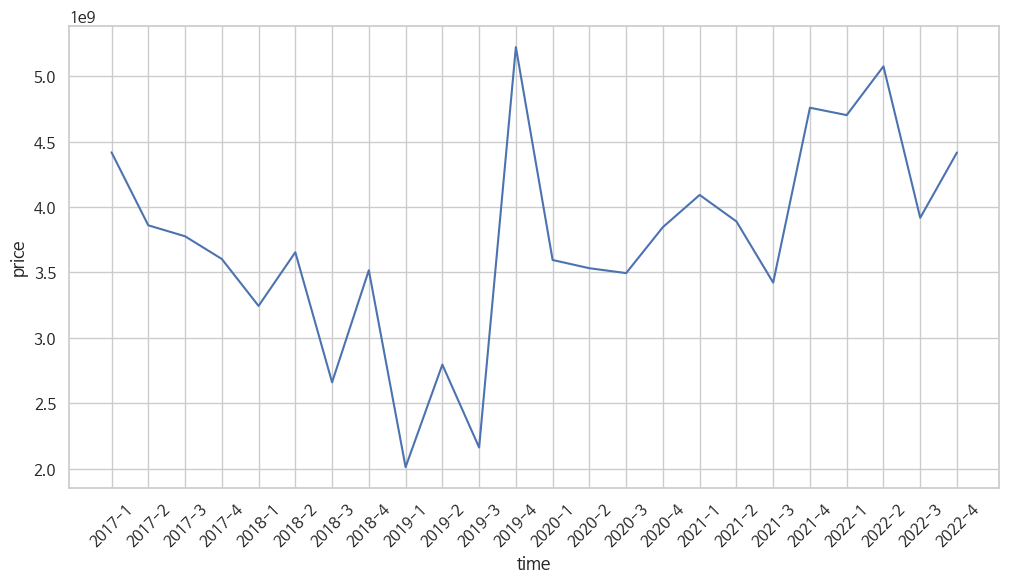

In [15]:
### seaborn lineplot을 이용, 전체 매출 시각화

# 시각화에 필요한 matplotlib.pyplot, seaborn 라이브러리 임폴트
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화
sns.set(style="whitegrid", color_codes=True, font='NanumBarunGothic')

plt.figure(figsize=(12, 6))
sns.lineplot(x=ap_shoe['분기'], y=ap_shoe['분기당_매출_금액'])
plt.xlabel('time')
plt.xticks(rotation=45)
plt.ylabel('price')
plt.show()

## 23년 1분기 매출 예측

In [16]:
# 총 매출액을 예측하기 위한 지표로는 성장성, 안정성, 시장성, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_shoe[['성장성', '시장성', '순점포증감률']]
y = ap_shoe.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -1.045485e+07  0.000000
1   0.873755 -2.386589e+07 -1.694915
2   0.978276  7.650534e+06  0.000000
3   0.954044  5.506402e+06 -1.724138
4   0.900466  2.325254e+07  0.000000
5   1.126410  2.206104e+07  0.000000
6   0.727924  9.030498e+06  1.818182
7   1.322074  1.240805e+07 -1.851852
8   0.572097  1.920718e+07 -4.761905
9   1.389431  3.590948e+07 -2.439024
10  0.773392  1.278520e+07  0.000000
11  2.415532  3.978462e+07  2.000000
12  0.688421  3.980820e+07  2.040816
13  0.982449  2.086987e+07  0.000000
14  0.989449  2.257633e+07  3.846154
15  1.100587  1.609890e+07 -1.960784
16  1.063937  3.406786e+07  0.000000
17  0.950516  1.836930e+07  0.000000
18  0.879791  1.716964e+07 -2.000000
19  1.390616  1.969110e+07 -2.040816
20  0.988141  4.997466e+07  2.564103
21  1.079267  2.490124e+07  0.000000
22  0.771890  2.837072e+07  0.000000
23  1.127493  2.393332e+07  0.000000
---------------------------------------------------------------------------

In [17]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [18]:
### 시계열 분석에 적합한 데이터를 만들어 주는 함수 정의
def make_dataset(X, y, window_size=10):
    X_data = []
    y_data = []
    for start in np.arange(len(X) - window_size):
        stop = start + window_size
        X_data.append(X[start:stop, :])
        y_data.append(y[stop])
    return np.array(X_data), np.array(y_data)




### 시계열 분석에서 마지막 테스트 데이터를 만들어 주는 함수 정의
def make_last_dataset(X, window_size=10):
    X_data_last = []
    for start in np.arange(len(X) - window_size +1):
        stop = start + window_size
        X_data_last.append(X[start:stop, :])
    return X_data_last[-1]

In [19]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [20]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.10838111 0.70742446 0.55319149]
 [0.30128362 0.64733004 0.55319149]]


In [21]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [22]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
# model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 64)             17408     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [23]:
### 모델 학습

# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2477
Epoch 1: val_loss improved from inf to 0.37542, saving model to stock_model.h5
1/1 [==============================] - 9s 9s/step - loss: 0.2477 - val_loss: 0.3754
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2468
Epoch 2: val_loss improved from 0.37542 to 0.37388, saving model to stock_model.h5
1/1 [==============================] - 0s 79ms/step - loss: 0.2468 - val_loss: 0.3739
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2460
Epoch 3: val_loss improved from 0.37388 to 0.37234, saving model to stock_model.h5
1/1 [==============================] - 0s 73ms/step - loss: 0.2460 - val_loss: 0.3723
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2451
Epoch 4: val_loss improved from 0.37234 to 0.37081, saving model to stock_model.h5
1/1 [==============================] - 0s 76ms/step - loss: 0.2451 - val_loss: 0.3708
Epoch 5/300
1/1 [=================

In [24]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 698ms/step
[[0.3704221 ]
 [0.46036848]
 [0.5361927 ]
 [0.44483438]]


In [25]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_shoe.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.838077,0.370422
2022-2,0.954186,0.460368
2022-3,0.593571,0.536193
2022-4,0.749147,0.444834


In [26]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_shoe.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_shoe의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.838077,0.370422,4701959306,3.200774e+09,1.501185e+09
2022-2,0.954186,0.460368,5074671571,3.489504e+09,1.585167e+09
2022-3,0.593571,0.536193,3917089120,3.732902e+09,1.841867e+08
2022-4,0.749147,0.444834,4416492440,3.439640e+09,9.768529e+08


In [27]:
df_test = df_test.reset_index()

### 결과

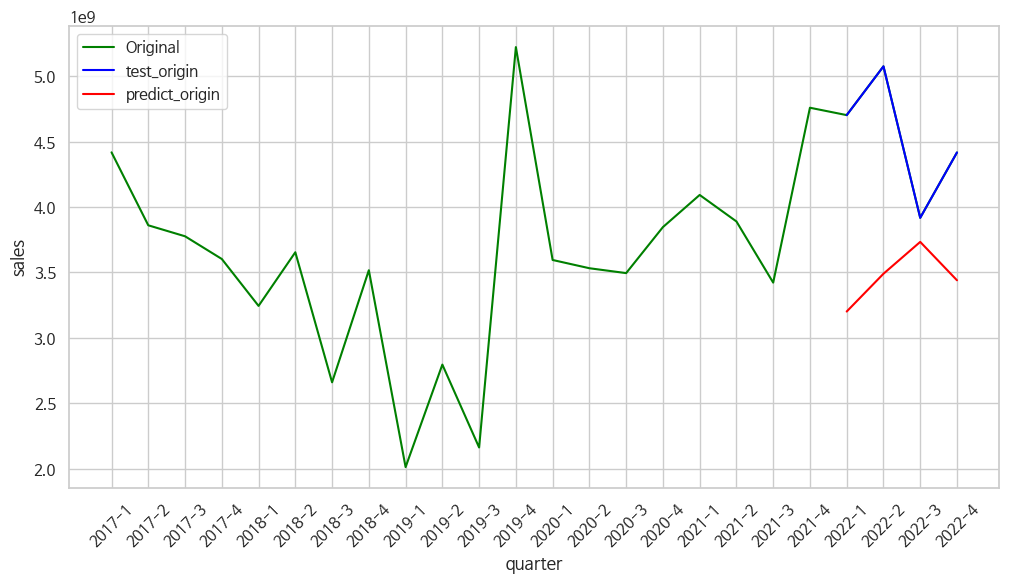

In [28]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_shoe['분기'], ap_shoe['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [29]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     1.061848e+09
std      6.440481e+08
min      1.841867e+08
25%      7.786863e+08
50%      1.239019e+09
75%      1.522181e+09
max      1.585167e+09
dtype: float64

In [30]:
### 23년 1분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 21ms/step
[[0.43790475]]
--------------------------------------------------------------------------------
예측된 매출  : 3417395456.0 


## 23년 1분기 성장성 예측

In [31]:
# 성장을 예측하기 위한 지표로는 성장성, 안정성, 시장성, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_shoe[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_shoe.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

     분기당_매출_금액           시장성    순점포증감률
0   4417438692 -1.045485e+07  0.000000
1   3859760196 -2.386589e+07 -1.694915
2   3775909746  7.650534e+06  0.000000
3   3602383201  5.506402e+06 -1.724138
4   3243824976  2.325254e+07  0.000000
5   3653877872  2.206104e+07  0.000000
6   2659745597  9.030498e+06  1.818182
7   3516380090  1.240805e+07 -1.851852
8   2011709157  1.920718e+07 -4.761905
9   2795131744  3.590948e+07 -2.439024
10  2161733568  1.278520e+07  0.000000
11  5221736378  3.978462e+07  2.000000
12  3594755364  3.980820e+07  2.040816
13  3531665275  2.086987e+07  0.000000
14  3494404106  2.257633e+07  3.846154
15  3845896753  1.609890e+07 -1.960784
16  4091790897  3.406786e+07  0.000000
17  3889313510  1.836930e+07  0.000000
18  3421783728  1.716964e+07 -2.000000
19  4758387298  1.969110e+07 -2.040816
20  4701959306  4.997466e+07  2.564103
21  5074671571  2.490124e+07  0.000000
22  3917089120  2.837072e+07  0.000000
23  4416492440  2.393332e+07  0.000000
-------------------------

In [32]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [33]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [34]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.59357128 0.70742446 0.55319149]
 [0.74914732 0.64733004 0.55319149]]


In [35]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [36]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [37]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1766
Epoch 1: val_loss improved from inf to 0.08319, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.1766 - val_loss: 0.0832
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1758
Epoch 2: val_loss improved from 0.08319 to 0.08245, saving model to stock_model.h5
1/1 [==============================] - 0s 101ms/step - loss: 0.1758 - val_loss: 0.0824
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1751
Epoch 3: val_loss improved from 0.08245 to 0.08171, saving model to stock_model.h5
1/1 [==============================] - 0s 88ms/step - loss: 0.1751 - val_loss: 0.0817
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1744
Epoch 4: val_loss improved from 0.08171 to 0.08099, saving model to stock_model.h5
1/1 [==============================] - 0s 78ms/step - loss: 0.1744 - val_loss: 0.0810
Epoch 5/300
1/1 [================

In [38]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 692ms/step
[[0.19575231]
 [0.24282895]
 [0.27787966]
 [0.24204715]]


In [39]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_shoe.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.225690,0.195752
2022-2,0.275123,0.242829
2022-3,0.108381,0.277880
2022-4,0.301284,0.242047


In [40]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_shoe.iloc[-len(pred):, 3].values       # 성장성이 ap_shoe의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.225690,0.195752,0.988141,0.932953,0.055188
2022-2,0.275123,0.242829,1.079267,1.019736,0.059531
2022-3,0.108381,0.277880,0.771890,1.084350,-0.312460
2022-4,0.301284,0.242047,1.127493,1.018295,0.109199


### 결과

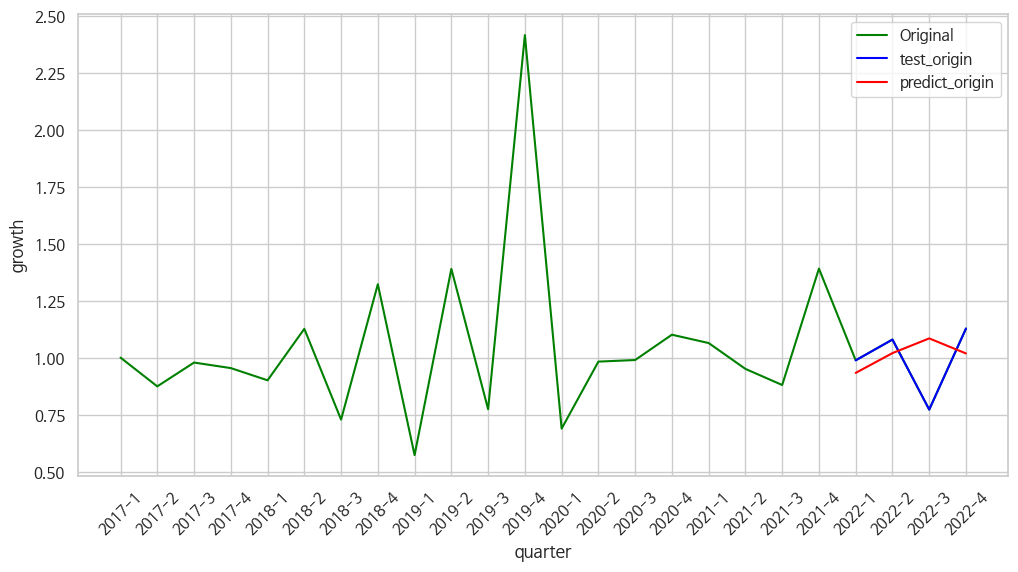

In [41]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_shoe['분기'], ap_shoe['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [42]:
## error의 요약 통계량
error.describe()

count    4.000000
mean    -0.022135
std      0.195094
min     -0.312460
25%     -0.036724
50%      0.057360
75%      0.071948
max      0.109199
dtype: float64

In [43]:
### 23년 1분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 22ms/step
[[0.23077142]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9975088238716125 


## 23년 1분기 시장성 예측

In [44]:
# 시장성을 예측하기 위한 지표로는 성장성, 안정성, 총매출, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_shoe[['성장성', '분기당_매출_금액', '순점포증감률']]
y = ap_shoe.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성   분기당_매출_금액    순점포증감률
0   1.000000  4417438692  0.000000
1   0.873755  3859760196 -1.694915
2   0.978276  3775909746  0.000000
3   0.954044  3602383201 -1.724138
4   0.900466  3243824976  0.000000
5   1.126410  3653877872  0.000000
6   0.727924  2659745597  1.818182
7   1.322074  3516380090 -1.851852
8   0.572097  2011709157 -4.761905
9   1.389431  2795131744 -2.439024
10  0.773392  2161733568  0.000000
11  2.415532  5221736378  2.000000
12  0.688421  3594755364  2.040816
13  0.982449  3531665275  0.000000
14  0.989449  3494404106  3.846154
15  1.100587  3845896753 -1.960784
16  1.063937  4091790897  0.000000
17  0.950516  3889313510  0.000000
18  0.879791  3421783728 -2.000000
19  1.390616  4758387298 -2.040816
20  0.988141  4701959306  2.564103
21  1.079267  5074671571  0.000000
22  0.771890  3917089120  0.000000
23  1.127493  4416492440  0.000000
--------------------------------------------------------------------------------
             시장성
0  -1.045485e+07
1  -2.3865

In [45]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [46]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [47]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.10838111 0.59357128 0.55319149]
 [0.30128362 0.74914732 0.55319149]]


In [48]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [49]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [50]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.3803
Epoch 1: val_loss improved from inf to 0.46291, saving model to stock_model.h5
1/1 [==============================] - 3s 3s/step - loss: 0.3803 - val_loss: 0.4629
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.3791
Epoch 2: val_loss improved from 0.46291 to 0.46124, saving model to stock_model.h5
1/1 [==============================] - 0s 78ms/step - loss: 0.3791 - val_loss: 0.4612
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.3779
Epoch 3: val_loss improved from 0.46124 to 0.45958, saving model to stock_model.h5
1/1 [==============================] - 0s 84ms/step - loss: 0.3779 - val_loss: 0.4596
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.3767
Epoch 4: val_loss improved from 0.45958 to 0.45792, saving model to stock_model.h5
1/1 [==============================] - 0s 84ms/step - loss: 0.3767 - val_loss: 0.4579
Epoch 5/300
1/1 [=================

In [51]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 677ms/step
[[0.4896175 ]
 [0.63504064]
 [0.72251   ]
 [0.6244805 ]]


In [52]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_shoe.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,1.000000,0.489617
2022-2,0.660438,0.635041
2022-3,0.707424,0.722510
2022-4,0.647330,0.624480


In [53]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_shoe.iloc[-len(pred):, 5].values       # 시장성이 ap_shoe의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,1.000000,0.489617,4.997466e+07,12287736.0,3.768693e+07
2022-2,0.660438,0.635041,2.490124e+07,23025864.0,1.875375e+06
2022-3,0.707424,0.722510,2.837072e+07,29484648.0,-1.113925e+06
2022-4,0.647330,0.624480,2.393332e+07,22246096.0,1.687222e+06


### 결과

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


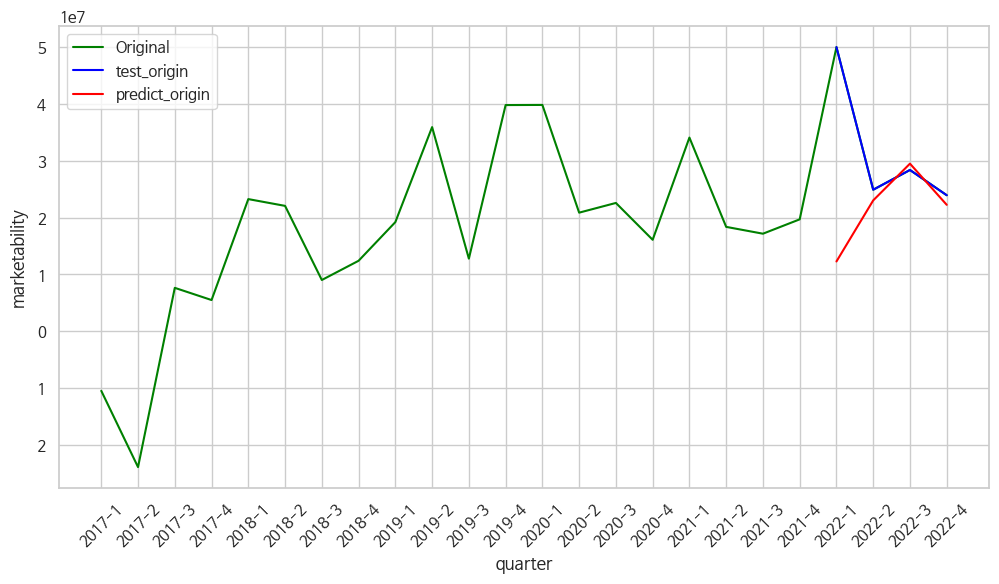

In [54]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_shoe['분기'], ap_shoe['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [55]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     1.003390e+07
std      1.848596e+07
min     -1.113925e+06
25%      9.869353e+05
50%      1.781298e+06
75%      1.082826e+07
max      3.768693e+07
dtype: float64

In [56]:
### 23년 1분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 23ms/step
[[0.57695144]]
--------------------------------------------------------------------------------
예측된 시장성  : 18736524.0 


## 23년 1분기 순점포증감률 예측

In [57]:
# 순점포증감률을 예측하기 위한 지표로는 성장성, 총매출, 시장성 선정

### X / y 데이터 생성
X = ap_shoe[['성장성', '분기당_매출_금액', '시장성']]
y = ap_shoe.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성   분기당_매출_금액           시장성
0   1.000000  4417438692 -1.045485e+07
1   0.873755  3859760196 -2.386589e+07
2   0.978276  3775909746  7.650534e+06
3   0.954044  3602383201  5.506402e+06
4   0.900466  3243824976  2.325254e+07
5   1.126410  3653877872  2.206104e+07
6   0.727924  2659745597  9.030498e+06
7   1.322074  3516380090  1.240805e+07
8   0.572097  2011709157  1.920718e+07
9   1.389431  2795131744  3.590948e+07
10  0.773392  2161733568  1.278520e+07
11  2.415532  5221736378  3.978462e+07
12  0.688421  3594755364  3.980820e+07
13  0.982449  3531665275  2.086987e+07
14  0.989449  3494404106  2.257633e+07
15  1.100587  3845896753  1.609890e+07
16  1.063937  4091790897  3.406786e+07
17  0.950516  3889313510  1.836930e+07
18  0.879791  3421783728  1.716964e+07
19  1.390616  4758387298  1.969110e+07
20  0.988141  4701959306  4.997466e+07
21  1.079267  5074671571  2.490124e+07
22  0.771890  3917089120  2.837072e+07
23  1.127493  4416492440  2.393332e+07
-------------------------

In [58]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [59]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [60]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.10838111 0.59357128 0.70742446]
 [0.30128362 0.74914732 0.64733004]]


In [61]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [62]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [63]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2953
Epoch 1: val_loss improved from inf to 0.38940, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.2953 - val_loss: 0.3894
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2943
Epoch 2: val_loss improved from 0.38940 to 0.38793, saving model to stock_model.h5
1/1 [==============================] - 0s 129ms/step - loss: 0.2943 - val_loss: 0.3879
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2932
Epoch 3: val_loss improved from 0.38793 to 0.38646, saving model to stock_model.h5
1/1 [==============================] - 0s 104ms/step - loss: 0.2932 - val_loss: 0.3865
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2922
Epoch 4: val_loss improved from 0.38646 to 0.38499, saving model to stock_model.h5
1/1 [==============================] - 0s 78ms/step - loss: 0.2922 - val_loss: 0.3850
Epoch 5/300
1/1 [===============

In [64]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.4939073]
 [0.6135755]
 [0.6579236]
 [0.5663707]]


In [65]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_shoe.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.851064,0.493907
2022-2,0.553191,0.613576
2022-3,0.553191,0.657924
2022-4,0.553191,0.566371


In [66]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_shoe.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_shoe의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.851064,0.493907,2.564103,-0.510322,3.074424
2022-2,0.553191,0.613576,0.000000,0.519789,-0.519789
2022-3,0.553191,0.657924,0.000000,0.901540,-0.901540
2022-4,0.553191,0.566371,0.000000,0.113448,-0.113448


### 결과

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


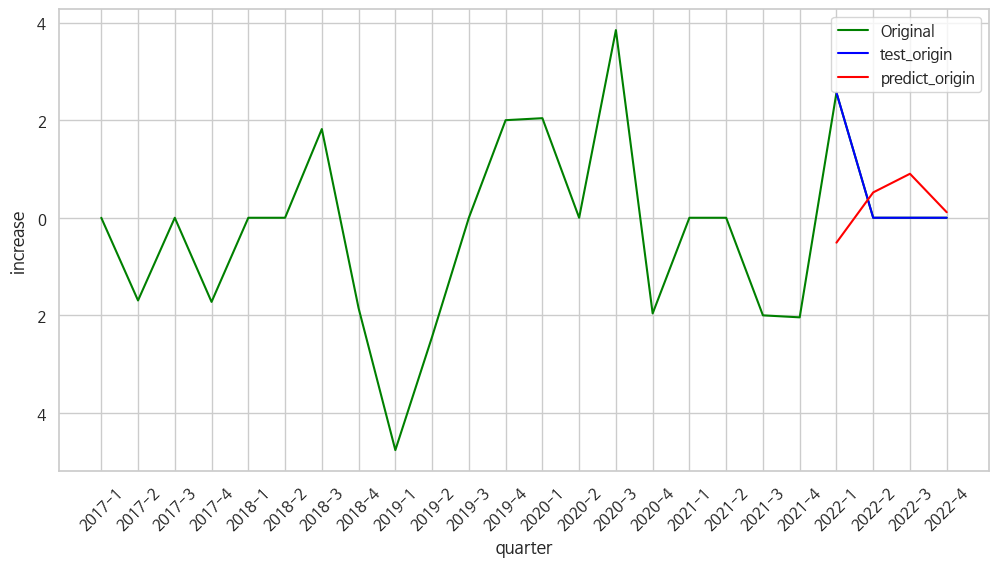

In [67]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_shoe['분기'], ap_shoe['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [68]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.384912
std      1.821655
min     -0.901540
25%     -0.615227
50%     -0.316618
75%      0.683520
max      3.074424
dtype: float64

In [69]:
### 23년 1분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 89ms/step
[[0.53390396]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -0.1660282015800476 


## 원본 데이터에 예측값 추가하기

In [70]:
print(sales)
print(growth)
print(marketability)
print(increase)

3417395500.0
0.9975088
18736524.0
-0.1660282


In [71]:
ap_shoe.loc[24] = ['2023-1', 'etability]ㅈ', sales, growth, increase, marketability]

<ipython-input-71-546bca9539b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_shoe.loc[24] = ['2023-1', 'etability]ㅈ', sales, growth, increase, marketability]


In [72]:
ap_shoe

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,신발,4.417439e+09,1.000000,0.000000,-1.045485e+07
1,2017-2,신발,3.859760e+09,0.873755,-1.694915,-2.386589e+07
2,2017-3,신발,3.775910e+09,0.978276,0.000000,7.650534e+06
3,2017-4,신발,3.602383e+09,0.954044,-1.724138,5.506402e+06
4,2018-1,신발,3.243825e+09,0.900466,0.000000,2.325254e+07
5,2018-2,신발,3.653878e+09,1.126410,0.000000,2.206104e+07
6,2018-3,신발,2.659746e+09,0.727924,1.818182,9.030498e+06
7,2018-4,신발,3.516380e+09,1.322074,-1.851852,1.240805e+07
8,2019-1,신발,2.011709e+09,0.572097,-4.761905,1.920718e+07
9,2019-2,신발,2.795132e+09,1.389431,-2.439024,3.590948e+07


## 23년 2분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [73]:
### X / y 데이터 생성
X = ap_shoe[['성장성', '시장성', '순점포증감률']]
y = ap_shoe.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -1.045485e+07  0.000000
1   0.873755 -2.386589e+07 -1.694915
2   0.978276  7.650534e+06  0.000000
3   0.954044  5.506402e+06 -1.724138
4   0.900466  2.325254e+07  0.000000
5   1.126410  2.206104e+07  0.000000
6   0.727924  9.030498e+06  1.818182
7   1.322074  1.240805e+07 -1.851852
8   0.572097  1.920718e+07 -4.761905
9   1.389431  3.590948e+07 -2.439024
10  0.773392  1.278520e+07  0.000000
11  2.415532  3.978462e+07  2.000000
12  0.688421  3.980820e+07  2.040816
13  0.982449  2.086987e+07  0.000000
14  0.989449  2.257633e+07  3.846154
15  1.100587  1.609890e+07 -1.960784
16  1.063937  3.406786e+07  0.000000
17  0.950516  1.836930e+07  0.000000
18  0.879791  1.716964e+07 -2.000000
19  1.390616  1.969110e+07 -2.040816
20  0.988141  4.997466e+07  2.564103
21  1.079267  2.490124e+07  0.000000
22  0.771890  2.837072e+07  0.000000
23  1.127493  2.393332e+07  0.000000
24  0.997509  1.873652e+07 -0.166028
--------------------------------------

In [74]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [75]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.30128362 0.64733004 0.55319149]
 [0.23077144 0.57695145 0.53390396]]


In [76]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [77]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_9 (LSTM)               (None, 32)                12416     
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [78]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2506
Epoch 1: val_loss improved from inf to 0.43439, saving model to stock_model.h5
1/1 [==============================] - 8s 8s/step - loss: 0.2506 - val_loss: 0.4344
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2496
Epoch 2: val_loss improved from 0.43439 to 0.43279, saving model to stock_model.h5
1/1 [==============================] - 0s 194ms/step - loss: 0.2496 - val_loss: 0.4328
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2487
Epoch 3: val_loss improved from 0.43279 to 0.43120, saving model to stock_model.h5
1/1 [==============================] - 0s 285ms/step - loss: 0.2487 - val_loss: 0.4312
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2478
Epoch 4: val_loss improved from 0.43120 to 0.42960, saving model to stock_model.h5
1/1 [==============================] - 0s 299ms/step - loss: 0.2478 - val_loss: 0.4296
Epoch 5/300
1/1 [==============

In [79]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 612ms/step
[[0.4606284 ]
 [0.5359461 ]
 [0.4442659 ]
 [0.43707472]]


In [80]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_shoe.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.954186,0.460628
2022-3,0.593571,0.535946
2022-4,0.749147,0.444266
2023-1,0.437905,0.437075


In [81]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_shoe.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_shoe의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.954186,0.460628,5.074672e+09,3.490339e+09,1.584332e+09
2022-3,0.593571,0.535946,3.917089e+09,3.732111e+09,1.849785e+08
2022-4,0.749147,0.444266,4.416492e+09,3.437815e+09,9.786777e+08
2023-1,0.437905,0.437075,3.417395e+09,3.414731e+09,2.664704e+06


In [82]:
df_test = df_test.reset_index()

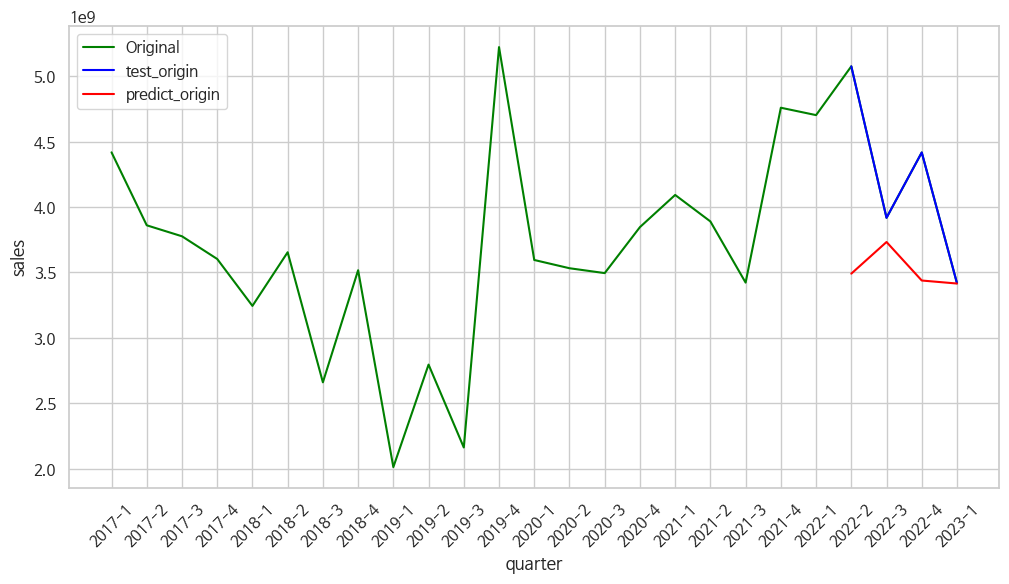

In [83]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_shoe['분기'], ap_shoe['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [84]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     6.876633e+08
std      7.327164e+08
min      2.664704e+06
25%      1.394001e+08
50%      5.818281e+08
75%      1.130091e+09
max      1.584332e+09
dtype: float64

In [85]:
### 23년 2분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 22ms/step
[[0.4448972]]
--------------------------------------------------------------------------------
예측된 매출  : 3439841280.0 


### 성장성

In [86]:
### X / y 데이터 생성
X = ap_shoe[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_shoe.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   4.417439e+09 -1.045485e+07  0.000000
1   3.859760e+09 -2.386589e+07 -1.694915
2   3.775910e+09  7.650534e+06  0.000000
3   3.602383e+09  5.506402e+06 -1.724138
4   3.243825e+09  2.325254e+07  0.000000
5   3.653878e+09  2.206104e+07  0.000000
6   2.659746e+09  9.030498e+06  1.818182
7   3.516380e+09  1.240805e+07 -1.851852
8   2.011709e+09  1.920718e+07 -4.761905
9   2.795132e+09  3.590948e+07 -2.439024
10  2.161734e+09  1.278520e+07  0.000000
11  5.221736e+09  3.978462e+07  2.000000
12  3.594755e+09  3.980820e+07  2.040816
13  3.531665e+09  2.086987e+07  0.000000
14  3.494404e+09  2.257633e+07  3.846154
15  3.845897e+09  1.609890e+07 -1.960784
16  4.091791e+09  3.406786e+07  0.000000
17  3.889314e+09  1.836930e+07  0.000000
18  3.421784e+09  1.716964e+07 -2.000000
19  4.758387e+09  1.969110e+07 -2.040816
20  4.701959e+09  4.997466e+07  2.564103
21  5.074672e+09  2.490124e+07  0.000000
22  3.917089e+09  2.837072e+07  0.000000
23  4.416492e+09

In [87]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [88]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.74914732 0.64733004 0.55319149]
 [0.43790479 0.57695145 0.53390396]]


In [89]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [90]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_11 (LSTM)              (None, 32)                12416     
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [91]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1614
Epoch 1: val_loss improved from inf to 0.09016, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.1614 - val_loss: 0.0902
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1607
Epoch 2: val_loss improved from 0.09016 to 0.08938, saving model to stock_model.h5
1/1 [==============================] - 0s 81ms/step - loss: 0.1607 - val_loss: 0.0894
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1600
Epoch 3: val_loss improved from 0.08938 to 0.08860, saving model to stock_model.h5
1/1 [==============================] - 0s 78ms/step - loss: 0.1600 - val_loss: 0.0886
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1594
Epoch 4: val_loss improved from 0.08860 to 0.08783, saving model to stock_model.h5
1/1 [==============================] - 0s 84ms/step - loss: 0.1594 - val_loss: 0.0878
Epoch 5/300
1/1 [=================

In [92]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 946ms/step
[[0.26448172]
 [0.3030953 ]
 [0.2636364 ]
 [0.25128973]]


In [93]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_shoe.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.275123,0.264482
2022-3,0.108381,0.303095
2022-4,0.301284,0.263636
2023-1,0.230771,0.251290


In [94]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_shoe.iloc[-len(pred):, 3].values       # 성장성이 ap_shoe의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.275123,0.264482,1.079267,1.059652,0.019616
2022-3,0.108381,0.303095,0.771890,1.130833,-0.358943
2022-4,0.301284,0.263636,1.127493,1.058093,0.069400
2023-1,0.230771,0.251290,0.997509,1.035333,-0.037824


In [95]:
df_test = df_test.reset_index()

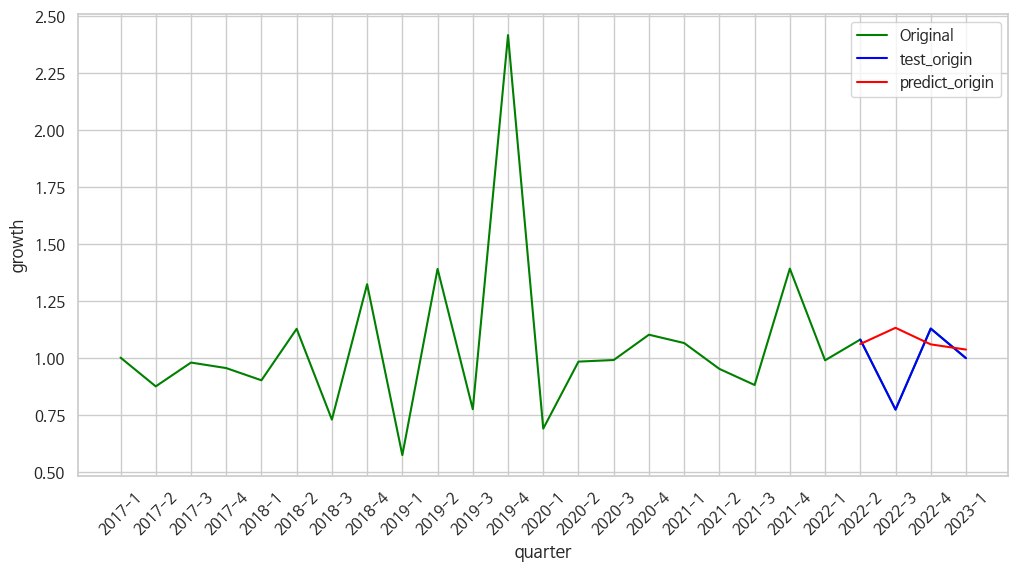

In [96]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_shoe['분기'], ap_shoe['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [97]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -0.076938
std      0.193041
min     -0.358943
25%     -0.118104
50%     -0.009104
75%      0.032062
max      0.069400
dtype: float64

In [98]:
### 23년 2분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 20ms/step
[[0.24584946]]
--------------------------------------------------------------------------------
예측된 성장성  : 1.0253040790557861 


### 시장성

In [99]:
### X / y 데이터 생성
X = ap_shoe[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_shoe.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   4.417439e+09  1.000000  0.000000
1   3.859760e+09  0.873755 -1.694915
2   3.775910e+09  0.978276  0.000000
3   3.602383e+09  0.954044 -1.724138
4   3.243825e+09  0.900466  0.000000
5   3.653878e+09  1.126410  0.000000
6   2.659746e+09  0.727924  1.818182
7   3.516380e+09  1.322074 -1.851852
8   2.011709e+09  0.572097 -4.761905
9   2.795132e+09  1.389431 -2.439024
10  2.161734e+09  0.773392  0.000000
11  5.221736e+09  2.415532  2.000000
12  3.594755e+09  0.688421  2.040816
13  3.531665e+09  0.982449  0.000000
14  3.494404e+09  0.989449  3.846154
15  3.845897e+09  1.100587 -1.960784
16  4.091791e+09  1.063937  0.000000
17  3.889314e+09  0.950516  0.000000
18  3.421784e+09  0.879791 -2.000000
19  4.758387e+09  1.390616 -2.040816
20  4.701959e+09  0.988141  2.564103
21  5.074672e+09  1.079267  0.000000
22  3.917089e+09  0.771890  0.000000
23  4.416492e+09  1.127493  0.000000
24  3.417395e+09  0.997509 -0.166028
--------------------------------------

In [100]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [101]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.74914732 0.30128362 0.55319149]
 [0.43790479 0.23077144 0.53390396]]


In [102]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [103]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_13 (LSTM)              (None, 32)                12416     
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [104]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.4126
Epoch 1: val_loss improved from inf to 0.48339, saving model to stock_model.h5
1/1 [==============================] - 3s 3s/step - loss: 0.4126 - val_loss: 0.4834
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.4114
Epoch 2: val_loss improved from 0.48339 to 0.48177, saving model to stock_model.h5
1/1 [==============================] - 0s 73ms/step - loss: 0.4114 - val_loss: 0.4818
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.4101
Epoch 3: val_loss improved from 0.48177 to 0.48016, saving model to stock_model.h5
1/1 [==============================] - 0s 83ms/step - loss: 0.4101 - val_loss: 0.4802
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.4088
Epoch 4: val_loss improved from 0.48016 to 0.47855, saving model to stock_model.h5
1/1 [==============================] - 0s 92ms/step - loss: 0.4088 - val_loss: 0.4786
Epoch 5/300
1/1 [=================

In [105]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 585ms/step
[[0.67029774]
 [0.77474743]
 [0.6726259 ]
 [0.61374724]]


In [106]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_shoe.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.660438,0.670298
2022-3,0.707424,0.774747
2022-4,0.647330,0.672626
2023-1,0.576951,0.613747


In [107]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_shoe.iloc[-len(pred):, 5].values       # 시장성이 ap_shoe의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.660438,0.670298,2.490124e+07,25629268.0,-7.280291e+05
2022-3,0.707424,0.774747,2.837072e+07,33341890.0,-4.971167e+06
2022-4,0.647330,0.672626,2.393332e+07,25801180.0,-1.867862e+06
2023-1,0.576951,0.613747,1.873652e+07,21453546.0,-2.717022e+06


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


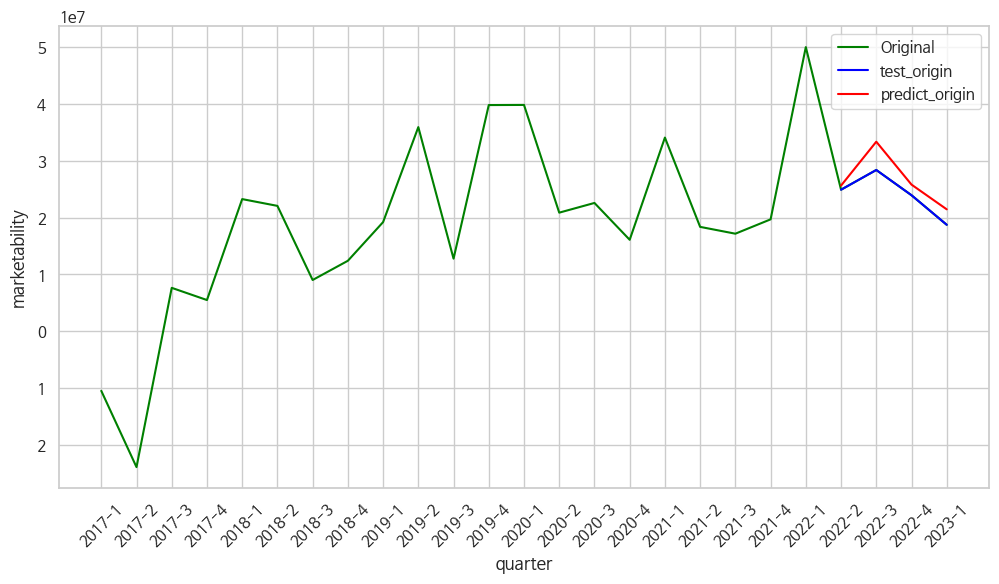

In [108]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_shoe['분기'], ap_shoe['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [109]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -2.571020e+06
std      1.795649e+06
min     -4.971167e+06
25%     -3.280558e+06
50%     -2.292442e+06
75%     -1.582904e+06
max     -7.280291e+05
dtype: float64

In [110]:
### 23년 2분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 21ms/step
[[0.63026565]]
--------------------------------------------------------------------------------
예측된 시장성  : 22673276.0 


### 순점포증감률

In [111]:
### X / y 데이터 생성
X = ap_shoe[['분기당_매출_금액', '성장성', '시장성']]
y = ap_shoe.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   4.417439e+09  1.000000 -1.045485e+07
1   3.859760e+09  0.873755 -2.386589e+07
2   3.775910e+09  0.978276  7.650534e+06
3   3.602383e+09  0.954044  5.506402e+06
4   3.243825e+09  0.900466  2.325254e+07
5   3.653878e+09  1.126410  2.206104e+07
6   2.659746e+09  0.727924  9.030498e+06
7   3.516380e+09  1.322074  1.240805e+07
8   2.011709e+09  0.572097  1.920718e+07
9   2.795132e+09  1.389431  3.590948e+07
10  2.161734e+09  0.773392  1.278520e+07
11  5.221736e+09  2.415532  3.978462e+07
12  3.594755e+09  0.688421  3.980820e+07
13  3.531665e+09  0.982449  2.086987e+07
14  3.494404e+09  0.989449  2.257633e+07
15  3.845897e+09  1.100587  1.609890e+07
16  4.091791e+09  1.063937  3.406786e+07
17  3.889314e+09  0.950516  1.836930e+07
18  3.421784e+09  0.879791  1.716964e+07
19  4.758387e+09  1.390616  1.969110e+07
20  4.701959e+09  0.988141  4.997466e+07
21  5.074672e+09  1.079267  2.490124e+07
22  3.917089e+09  0.771890  2.837072e+07
23  4.416492e+09

In [112]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [113]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.74914732 0.30128362 0.64733004]
 [0.43790479 0.23077144 0.57695145]]


In [114]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [115]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_15 (LSTM)              (None, 32)                12416     
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [116]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.3243
Epoch 1: val_loss improved from inf to 0.39201, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.3243 - val_loss: 0.3920
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.3232
Epoch 2: val_loss improved from 0.39201 to 0.39056, saving model to stock_model.h5
1/1 [==============================] - 0s 116ms/step - loss: 0.3232 - val_loss: 0.3906
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.3221
Epoch 3: val_loss improved from 0.39056 to 0.38912, saving model to stock_model.h5
1/1 [==============================] - 0s 93ms/step - loss: 0.3221 - val_loss: 0.3891
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.3210
Epoch 4: val_loss improved from 0.38912 to 0.38767, saving model to stock_model.h5
1/1 [==============================] - 0s 107ms/step - loss: 0.3210 - val_loss: 0.3877
Epoch 5/300
1/1 [===============

In [117]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 614ms/step
[[0.6348604 ]
 [0.689586  ]
 [0.59754306]
 [0.5561826 ]]


In [118]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_shoe.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.553191,0.634860
2022-3,0.553191,0.689586
2022-4,0.553191,0.597543
2023-1,0.533904,0.556183


In [119]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_shoe.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_shoe의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.553191,0.634860,0.000000,0.703011,-0.703011
2022-3,0.553191,0.689586,0.000000,1.174092,-1.174092
2022-4,0.553191,0.597543,0.000000,0.381781,-0.381781
2023-1,0.533904,0.556183,-0.166028,0.025748,-0.191776


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


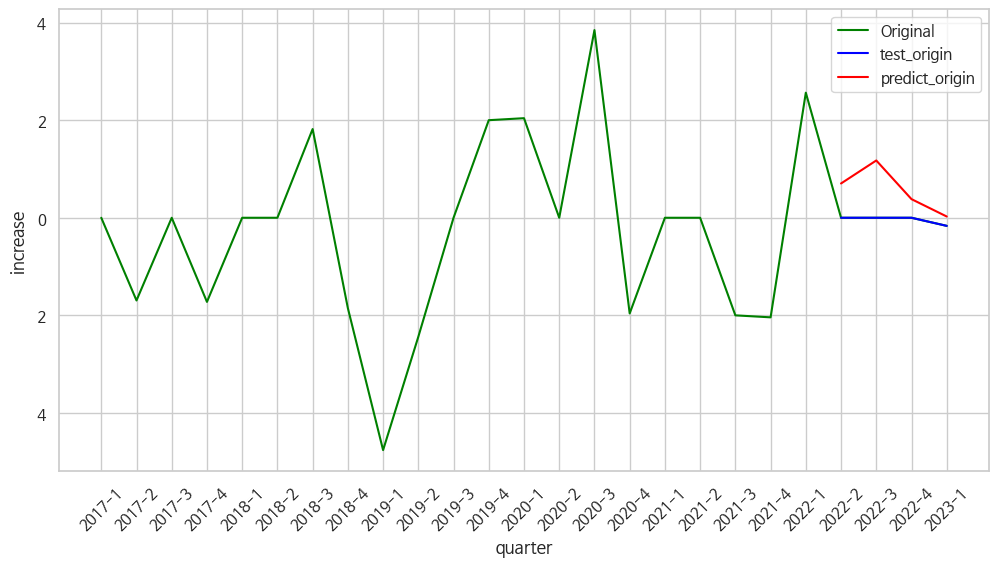

In [120]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_shoe['분기'], ap_shoe['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [121]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -0.612665
std      0.429658
min     -1.174092
25%     -0.820781
50%     -0.542396
75%     -0.334280
max     -0.191776
dtype: float64

In [122]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 22ms/step
[[0.54537874]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -0.06725256890058517 


### 추가


In [123]:
ap_shoe.loc[25] = ['2023-2', '신발수리리', sales, growth, increase, marketability]

<ipython-input-123-c66012485a1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_shoe.loc[25] = ['2023-2', '신발수리리', sales, growth, increase, marketability]


In [124]:
ap_shoe

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,신발,4.417439e+09,1.000000,0.000000,-1.045485e+07
1,2017-2,신발,3.859760e+09,0.873755,-1.694915,-2.386589e+07
2,2017-3,신발,3.775910e+09,0.978276,0.000000,7.650534e+06
3,2017-4,신발,3.602383e+09,0.954044,-1.724138,5.506402e+06
4,2018-1,신발,3.243825e+09,0.900466,0.000000,2.325254e+07
5,2018-2,신발,3.653878e+09,1.126410,0.000000,2.206104e+07
6,2018-3,신발,2.659746e+09,0.727924,1.818182,9.030498e+06
7,2018-4,신발,3.516380e+09,1.322074,-1.851852,1.240805e+07
8,2019-1,신발,2.011709e+09,0.572097,-4.761905,1.920718e+07
9,2019-2,신발,2.795132e+09,1.389431,-2.439024,3.590948e+07


## 23년 3분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [125]:
################ 매출 ####################

### X / y 데이터 생성
X = ap_shoe[['성장성', '시장성', '순점포증감률']]
y = ap_shoe.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -1.045485e+07  0.000000
1   0.873755 -2.386589e+07 -1.694915
2   0.978276  7.650534e+06  0.000000
3   0.954044  5.506402e+06 -1.724138
4   0.900466  2.325254e+07  0.000000
5   1.126410  2.206104e+07  0.000000
6   0.727924  9.030498e+06  1.818182
7   1.322074  1.240805e+07 -1.851852
8   0.572097  1.920718e+07 -4.761905
9   1.389431  3.590948e+07 -2.439024
10  0.773392  1.278520e+07  0.000000
11  2.415532  3.978462e+07  2.000000
12  0.688421  3.980820e+07  2.040816
13  0.982449  2.086987e+07  0.000000
14  0.989449  2.257633e+07  3.846154
15  1.100587  1.609890e+07 -1.960784
16  1.063937  3.406786e+07  0.000000
17  0.950516  1.836930e+07  0.000000
18  0.879791  1.716964e+07 -2.000000
19  1.390616  1.969110e+07 -2.040816
20  0.988141  4.997466e+07  2.564103
21  1.079267  2.490124e+07  0.000000
22  0.771890  2.837072e+07  0.000000
23  1.127493  2.393332e+07  0.000000
24  0.997509  1.873652e+07 -0.166028
25  1.025304  2.267328e+07 -0.067253
-

In [126]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [127]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.23077144 0.57695145 0.53390396]
 [0.2458494  0.63026568 0.54537874]]


In [128]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [129]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_17 (LSTM)              (None, 32)                12416     
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [130]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2521
Epoch 1: val_loss improved from inf to 0.52358, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2521 - val_loss: 0.5236
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2511
Epoch 2: val_loss improved from 0.52358 to 0.52186, saving model to stock_model.h5
1/1 [==============================] - 0s 98ms/step - loss: 0.2511 - val_loss: 0.5219
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2501
Epoch 3: val_loss improved from 0.52186 to 0.52014, saving model to stock_model.h5
1/1 [==============================] - 0s 73ms/step - loss: 0.2501 - val_loss: 0.5201
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2491
Epoch 4: val_loss improved from 0.52014 to 0.51844, saving model to stock_model.h5
1/1 [==============================] - 0s 75ms/step - loss: 0.2491 - val_loss: 0.5184
Epoch 5/300
1/1 [=================

In [131]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 846ms/step
[[0.5085377 ]
 [0.42321458]
 [0.41659334]
 [0.4239272 ]]


In [132]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_shoe.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.593571,0.508538
2022-4,0.749147,0.423215
2023-1,0.437905,0.416593
2023-2,0.444897,0.423927


In [133]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_shoe.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_shoe의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.593571,0.508538,3.917089e+09,3.644129e+09,2.729601e+08
2022-4,0.749147,0.423215,4.416492e+09,3.370239e+09,1.046253e+09
2023-1,0.437905,0.416593,3.417395e+09,3.348985e+09,6.841037e+07
2023-2,0.444897,0.423927,3.439841e+09,3.372527e+09,6.731418e+07


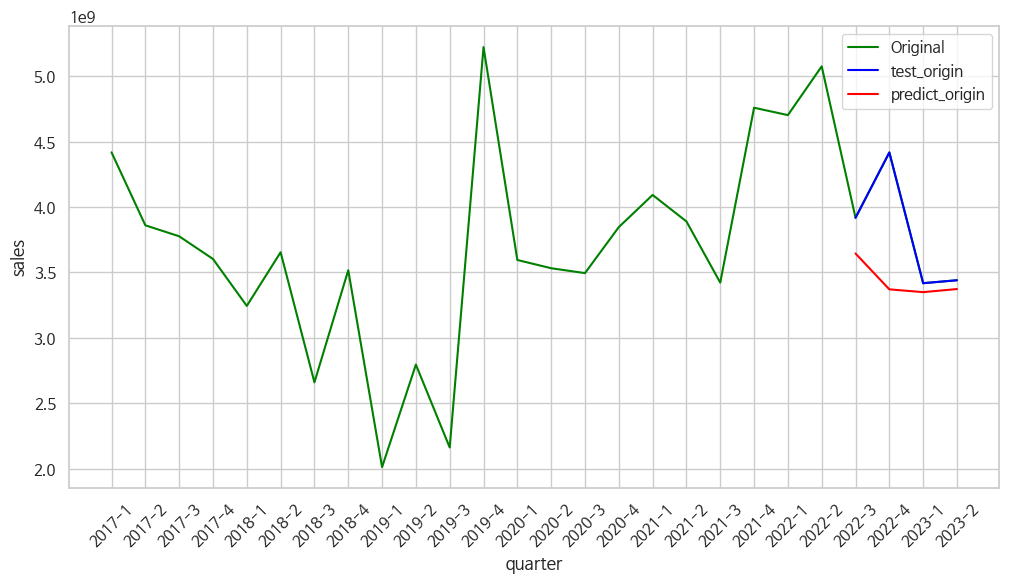

In [134]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_shoe['분기'], ap_shoe['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [135]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     3.637344e+08
std      4.651712e+08
min      6.731418e+07
25%      6.813632e+07
50%      1.706852e+08
75%      4.662833e+08
max      1.046253e+09
dtype: float64

In [136]:
### 23년 3분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 49ms/step
[[0.4105059]]
--------------------------------------------------------------------------------
예측된 매출  : 3329444352.0 


### 성장성

In [137]:
X = ap_shoe[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_shoe.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   4.417439e+09 -1.045485e+07  0.000000
1   3.859760e+09 -2.386589e+07 -1.694915
2   3.775910e+09  7.650534e+06  0.000000
3   3.602383e+09  5.506402e+06 -1.724138
4   3.243825e+09  2.325254e+07  0.000000
5   3.653878e+09  2.206104e+07  0.000000
6   2.659746e+09  9.030498e+06  1.818182
7   3.516380e+09  1.240805e+07 -1.851852
8   2.011709e+09  1.920718e+07 -4.761905
9   2.795132e+09  3.590948e+07 -2.439024
10  2.161734e+09  1.278520e+07  0.000000
11  5.221736e+09  3.978462e+07  2.000000
12  3.594755e+09  3.980820e+07  2.040816
13  3.531665e+09  2.086987e+07  0.000000
14  3.494404e+09  2.257633e+07  3.846154
15  3.845897e+09  1.609890e+07 -1.960784
16  4.091791e+09  3.406786e+07  0.000000
17  3.889314e+09  1.836930e+07  0.000000
18  3.421784e+09  1.716964e+07 -2.000000
19  4.758387e+09  1.969110e+07 -2.040816
20  4.701959e+09  4.997466e+07  2.564103
21  5.074672e+09  2.490124e+07  0.000000
22  3.917089e+09  2.837072e+07  0.000000
23  4.416492e+09

In [138]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [139]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.43790479 0.57695145 0.53390396]
 [0.4448972  0.63026568 0.54537874]]


In [140]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [141]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_19 (LSTM)              (None, 32)                12416     
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [142]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1539
Epoch 1: val_loss improved from inf to 0.09354, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.1539 - val_loss: 0.0935
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1532
Epoch 2: val_loss improved from 0.09354 to 0.09275, saving model to stock_model.h5
1/1 [==============================] - 0s 89ms/step - loss: 0.1532 - val_loss: 0.0928
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1526
Epoch 3: val_loss improved from 0.09275 to 0.09197, saving model to stock_model.h5
1/1 [==============================] - 0s 76ms/step - loss: 0.1526 - val_loss: 0.0920
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1519
Epoch 4: val_loss improved from 0.09197 to 0.09118, saving model to stock_model.h5
1/1 [==============================] - 0s 84ms/step - loss: 0.1519 - val_loss: 0.0912
Epoch 5/300
1/1 [=================

In [143]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 606ms/step
[[0.32110494]
 [0.27932402]
 [0.26653546]
 [0.26075453]]


In [144]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_shoe.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.108381,0.321105
2022-4,0.301284,0.279324
2023-1,0.230771,0.266535
2023-2,0.245849,0.260755


In [145]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_shoe.iloc[-len(pred):, 3].values       # 성장성이 ap_shoe의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.108381,0.321105,0.771890,1.164033,-0.392143
2022-4,0.301284,0.279324,1.127493,1.087012,0.040481
2023-1,0.230771,0.266535,0.997509,1.063437,-0.065929
2023-2,0.245849,0.260755,1.025304,1.052781,-0.027477


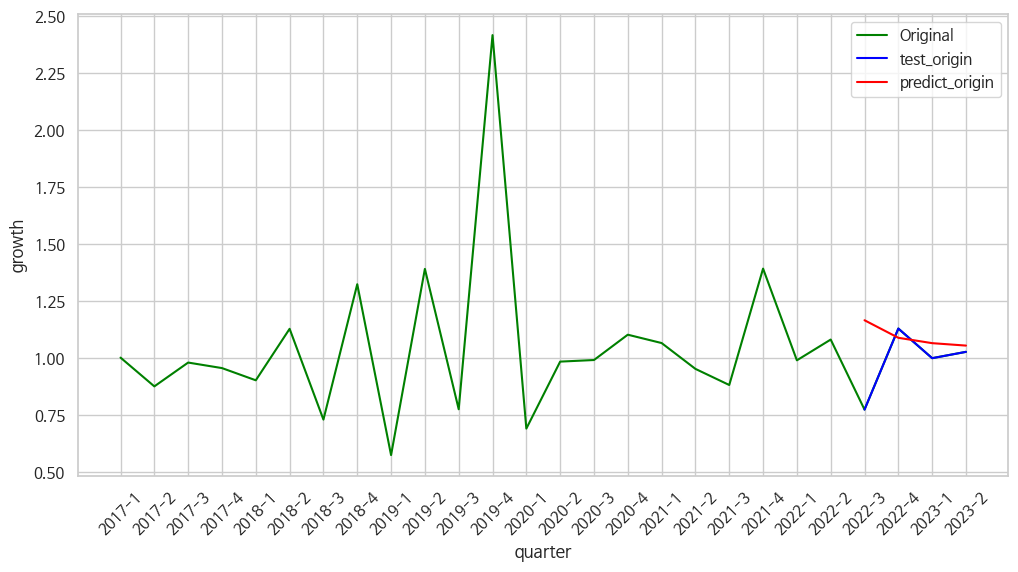

In [146]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_shoe['분기'], ap_shoe['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [147]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -0.111267
std      0.192350
min     -0.392143
25%     -0.147482
50%     -0.046703
75%     -0.010487
max      0.040481
dtype: float64

In [148]:
### 23년 3분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 23ms/step
[[0.24250852]]
--------------------------------------------------------------------------------
예측된 성장성  : 1.0191453695297241 


### 시장성

In [149]:
### X / y 데이터 생성
X = ap_shoe[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_shoe.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   4.417439e+09  1.000000  0.000000
1   3.859760e+09  0.873755 -1.694915
2   3.775910e+09  0.978276  0.000000
3   3.602383e+09  0.954044 -1.724138
4   3.243825e+09  0.900466  0.000000
5   3.653878e+09  1.126410  0.000000
6   2.659746e+09  0.727924  1.818182
7   3.516380e+09  1.322074 -1.851852
8   2.011709e+09  0.572097 -4.761905
9   2.795132e+09  1.389431 -2.439024
10  2.161734e+09  0.773392  0.000000
11  5.221736e+09  2.415532  2.000000
12  3.594755e+09  0.688421  2.040816
13  3.531665e+09  0.982449  0.000000
14  3.494404e+09  0.989449  3.846154
15  3.845897e+09  1.100587 -1.960784
16  4.091791e+09  1.063937  0.000000
17  3.889314e+09  0.950516  0.000000
18  3.421784e+09  0.879791 -2.000000
19  4.758387e+09  1.390616 -2.040816
20  4.701959e+09  0.988141  2.564103
21  5.074672e+09  1.079267  0.000000
22  3.917089e+09  0.771890  0.000000
23  4.416492e+09  1.127493  0.000000
24  3.417395e+09  0.997509 -0.166028
25  3.439841e+09  1.025304 -0.067253
-

In [150]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [151]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.43790479 0.23077144 0.53390396]
 [0.4448972  0.2458494  0.54537874]]


In [152]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [153]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_21 (LSTM)              (None, 32)                12416     
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [154]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.4126
Epoch 1: val_loss improved from inf to 0.49060, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.4126 - val_loss: 0.4906
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.4113
Epoch 2: val_loss improved from 0.49060 to 0.48900, saving model to stock_model.h5
1/1 [==============================] - 0s 106ms/step - loss: 0.4113 - val_loss: 0.4890
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.4100
Epoch 3: val_loss improved from 0.48900 to 0.48742, saving model to stock_model.h5
1/1 [==============================] - 0s 117ms/step - loss: 0.4100 - val_loss: 0.4874
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.4086
Epoch 4: val_loss improved from 0.48742 to 0.48584, saving model to stock_model.h5
1/1 [==============================] - 0s 103ms/step - loss: 0.4086 - val_loss: 0.4858
Epoch 5/300
1/1 [==============

In [155]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 744ms/step
[[0.75678873]
 [0.6621559 ]
 [0.60170233]
 [0.618208  ]]


In [156]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_shoe.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.707424,0.756789
2022-4,0.647330,0.662156
2023-1,0.576951,0.601702
2023-2,0.630266,0.618208


In [157]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_shoe.iloc[-len(pred):, 5].values       # 시장성이 ap_shoe의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.707424,0.756789,2.837072e+07,32015810.0,-3.645087e+06
2022-4,0.647330,0.662156,2.393332e+07,25028070.0,-1.094752e+06
2023-1,0.576951,0.601702,1.873652e+07,20564144.0,-1.827620e+06
2023-2,0.630266,0.618208,2.267328e+07,21782930.0,8.903460e+05


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


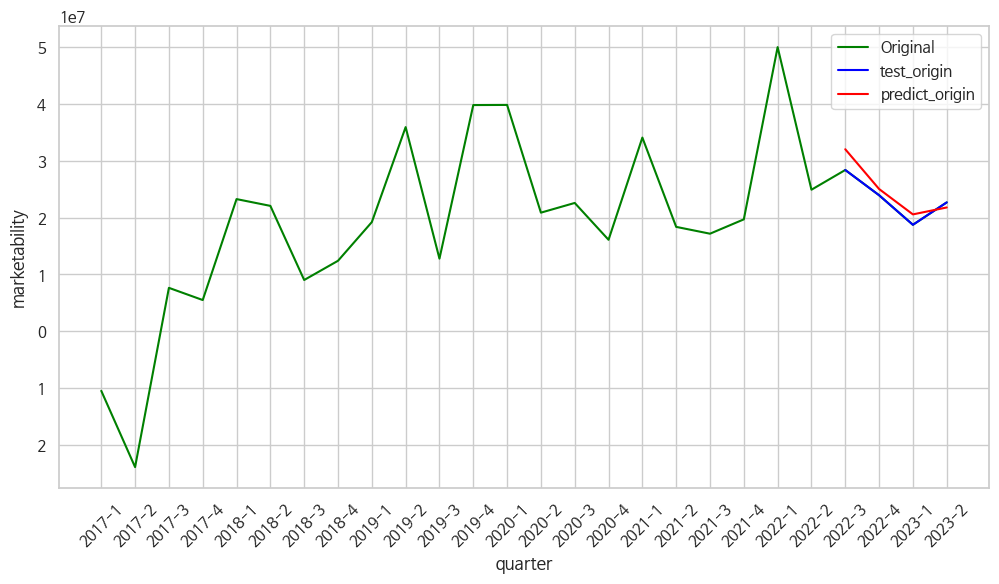

In [158]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_shoe['분기'], ap_shoe['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [159]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -1.419278e+06
std      1.876224e+06
min     -3.645087e+06
25%     -2.281987e+06
50%     -1.461186e+06
75%     -5.984776e+05
max      8.903460e+05
dtype: float64

In [160]:
### 23년 3분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 20ms/step
[[0.5521711]]
--------------------------------------------------------------------------------
예측된 시장성  : 16906730.0 


### 순점포증감률

In [161]:
### X / y 데이터 생성
X = ap_shoe[['분기당_매출_금액', '성장성', '시장성']]
y = ap_shoe.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   4.417439e+09  1.000000 -1.045485e+07
1   3.859760e+09  0.873755 -2.386589e+07
2   3.775910e+09  0.978276  7.650534e+06
3   3.602383e+09  0.954044  5.506402e+06
4   3.243825e+09  0.900466  2.325254e+07
5   3.653878e+09  1.126410  2.206104e+07
6   2.659746e+09  0.727924  9.030498e+06
7   3.516380e+09  1.322074  1.240805e+07
8   2.011709e+09  0.572097  1.920718e+07
9   2.795132e+09  1.389431  3.590948e+07
10  2.161734e+09  0.773392  1.278520e+07
11  5.221736e+09  2.415532  3.978462e+07
12  3.594755e+09  0.688421  3.980820e+07
13  3.531665e+09  0.982449  2.086987e+07
14  3.494404e+09  0.989449  2.257633e+07
15  3.845897e+09  1.100587  1.609890e+07
16  4.091791e+09  1.063937  3.406786e+07
17  3.889314e+09  0.950516  1.836930e+07
18  3.421784e+09  0.879791  1.716964e+07
19  4.758387e+09  1.390616  1.969110e+07
20  4.701959e+09  0.988141  4.997466e+07
21  5.074672e+09  1.079267  2.490124e+07
22  3.917089e+09  0.771890  2.837072e+07
23  4.416492e+09

In [162]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [163]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.43790479 0.23077144 0.57695145]
 [0.4448972  0.2458494  0.63026568]]


In [164]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [165]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_23 (LSTM)              (None, 32)                12416     
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [166]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.3263
Epoch 1: val_loss improved from inf to 0.39057, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.3263 - val_loss: 0.3906
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.3252
Epoch 2: val_loss improved from 0.39057 to 0.38915, saving model to stock_model.h5
1/1 [==============================] - 0s 97ms/step - loss: 0.3252 - val_loss: 0.3891
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.3240
Epoch 3: val_loss improved from 0.38915 to 0.38773, saving model to stock_model.h5
1/1 [==============================] - 0s 79ms/step - loss: 0.3240 - val_loss: 0.3877
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.3228
Epoch 4: val_loss improved from 0.38773 to 0.38632, saving model to stock_model.h5
1/1 [==============================] - 0s 87ms/step - loss: 0.3228 - val_loss: 0.3863
Epoch 5/300
1/1 [=================

In [167]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 610ms/step
[[0.71748227]
 [0.6211211 ]
 [0.57849556]
 [0.5670662 ]]


In [168]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_shoe.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.553191,0.717482
2022-4,0.553191,0.621121
2023-1,0.533904,0.578496
2023-2,0.545379,0.567066


In [169]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_shoe.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_shoe의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.553191,0.717482,0.000000,1.414225,-1.414225
2022-4,0.553191,0.621121,0.000000,0.584742,-0.584742
2023-1,0.533904,0.578496,-0.166028,0.217819,-0.383847
2023-2,0.545379,0.567066,-0.067253,0.119434,-0.186687


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


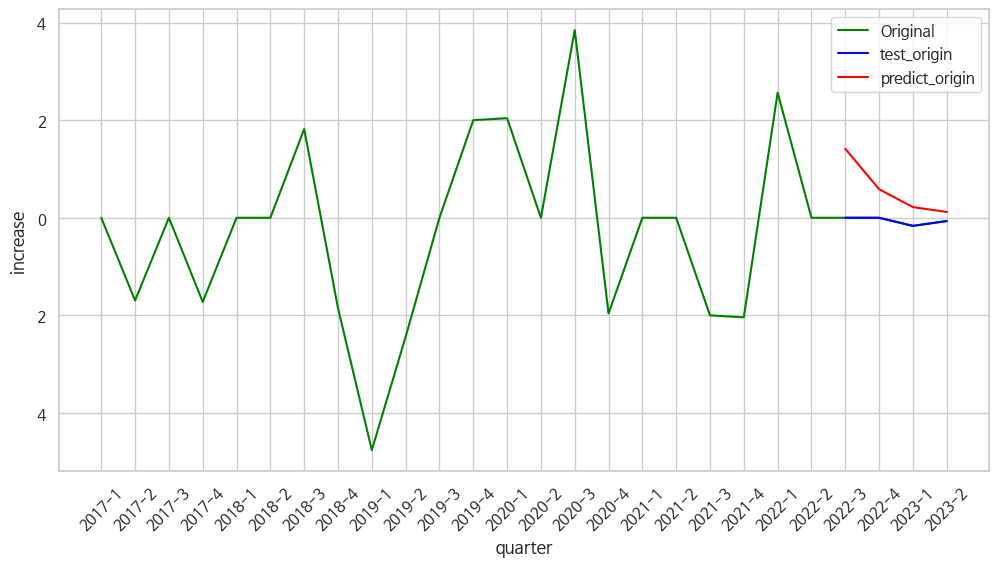

In [170]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_shoe['분기'], ap_shoe['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [171]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -0.642375
std      0.539618
min     -1.414225
25%     -0.792113
50%     -0.484295
75%     -0.334557
max     -0.186687
dtype: float64

In [172]:
### 23년 3분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 22ms/step
[[0.50621074]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -0.40441301465034485 


### 추가

In [173]:
ap_shoe.loc[26] = ['2023-3', '신발', sales, growth, increase, marketability]

<ipython-input-173-946041b3682e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_shoe.loc[26] = ['2023-3', '신발', sales, growth, increase, marketability]


In [174]:
ap_shoe

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,신발,4.417439e+09,1.000000,0.000000,-1.045485e+07
1,2017-2,신발,3.859760e+09,0.873755,-1.694915,-2.386589e+07
2,2017-3,신발,3.775910e+09,0.978276,0.000000,7.650534e+06
3,2017-4,신발,3.602383e+09,0.954044,-1.724138,5.506402e+06
4,2018-1,신발,3.243825e+09,0.900466,0.000000,2.325254e+07
5,2018-2,신발,3.653878e+09,1.126410,0.000000,2.206104e+07
6,2018-3,신발,2.659746e+09,0.727924,1.818182,9.030498e+06
7,2018-4,신발,3.516380e+09,1.322074,-1.851852,1.240805e+07
8,2019-1,신발,2.011709e+09,0.572097,-4.761905,1.920718e+07
9,2019-2,신발,2.795132e+09,1.389431,-2.439024,3.590948e+07


## 23년 4분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본데이터에 추가

### 매출

In [175]:
### X / y 데이터 생성
X = ap_shoe[['성장성', '시장성', '순점포증감률']]
y = ap_shoe.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -1.045485e+07  0.000000
1   0.873755 -2.386589e+07 -1.694915
2   0.978276  7.650534e+06  0.000000
3   0.954044  5.506402e+06 -1.724138
4   0.900466  2.325254e+07  0.000000
5   1.126410  2.206104e+07  0.000000
6   0.727924  9.030498e+06  1.818182
7   1.322074  1.240805e+07 -1.851852
8   0.572097  1.920718e+07 -4.761905
9   1.389431  3.590948e+07 -2.439024
10  0.773392  1.278520e+07  0.000000
11  2.415532  3.978462e+07  2.000000
12  0.688421  3.980820e+07  2.040816
13  0.982449  2.086987e+07  0.000000
14  0.989449  2.257633e+07  3.846154
15  1.100587  1.609890e+07 -1.960784
16  1.063937  3.406786e+07  0.000000
17  0.950516  1.836930e+07  0.000000
18  0.879791  1.716964e+07 -2.000000
19  1.390616  1.969110e+07 -2.040816
20  0.988141  4.997466e+07  2.564103
21  1.079267  2.490124e+07  0.000000
22  0.771890  2.837072e+07  0.000000
23  1.127493  2.393332e+07  0.000000
24  0.997509  1.873652e+07 -0.166028
25  1.025304  2.267328e+07 -0.067253
2

In [176]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [177]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.2458494  0.63026568 0.54537874]
 [0.24250852 0.55217112 0.50621074]]


In [178]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [179]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_25 (LSTM)              (None, 32)                12416     
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [180]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2521
Epoch 1: val_loss improved from inf to 0.51028, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2521 - val_loss: 0.5103
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2511
Epoch 2: val_loss improved from 0.51028 to 0.50854, saving model to stock_model.h5
1/1 [==============================] - 0s 104ms/step - loss: 0.2511 - val_loss: 0.5085
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2501
Epoch 3: val_loss improved from 0.50854 to 0.50681, saving model to stock_model.h5
1/1 [==============================] - 0s 119ms/step - loss: 0.2501 - val_loss: 0.5068
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2491
Epoch 4: val_loss improved from 0.50681 to 0.50509, saving model to stock_model.h5
1/1 [==============================] - 0s 123ms/step - loss: 0.2491 - val_loss: 0.5051
Epoch 5/300
1/1 [==============

In [181]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 609ms/step
[[0.42321458]
 [0.41659334]
 [0.4239272 ]
 [0.4105059 ]]


In [182]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_shoe.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.749147,0.423215
2023-1,0.437905,0.416593
2023-2,0.444897,0.423927
2023-3,0.410506,0.410506


In [183]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_shoe.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_shoe의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.749147,0.423215,4.416492e+09,3.370239e+09,1.046253e+09
2023-1,0.437905,0.416593,3.417395e+09,3.348985e+09,6.841037e+07
2023-2,0.444897,0.423927,3.439841e+09,3.372527e+09,6.731418e+07
2023-3,0.410506,0.410506,3.329444e+09,3.329444e+09,0.000000e+00


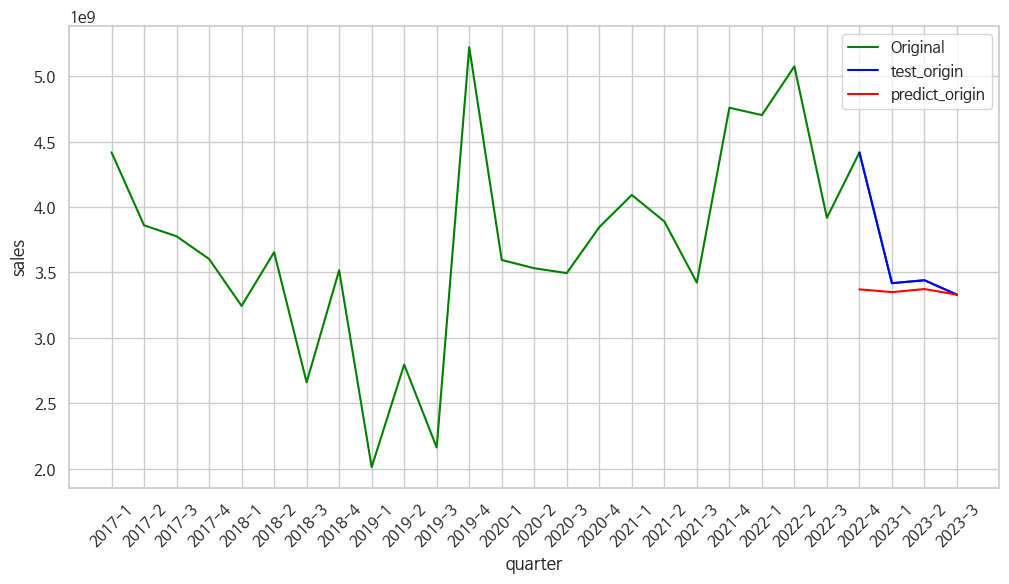

In [184]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_shoe['분기'], ap_shoe['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [185]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     2.954944e+08
std      5.015272e+08
min      0.000000e+00
25%      5.048563e+07
50%      6.786227e+07
75%      3.128710e+08
max      1.046253e+09
dtype: float64

In [186]:
### 23년 4분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 21ms/step
[[0.41212448]]
--------------------------------------------------------------------------------
예측된 매출  : 3334639872.0 


### 성장성

In [187]:
X = ap_shoe[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_shoe.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   4.417439e+09 -1.045485e+07  0.000000
1   3.859760e+09 -2.386589e+07 -1.694915
2   3.775910e+09  7.650534e+06  0.000000
3   3.602383e+09  5.506402e+06 -1.724138
4   3.243825e+09  2.325254e+07  0.000000
5   3.653878e+09  2.206104e+07  0.000000
6   2.659746e+09  9.030498e+06  1.818182
7   3.516380e+09  1.240805e+07 -1.851852
8   2.011709e+09  1.920718e+07 -4.761905
9   2.795132e+09  3.590948e+07 -2.439024
10  2.161734e+09  1.278520e+07  0.000000
11  5.221736e+09  3.978462e+07  2.000000
12  3.594755e+09  3.980820e+07  2.040816
13  3.531665e+09  2.086987e+07  0.000000
14  3.494404e+09  2.257633e+07  3.846154
15  3.845897e+09  1.609890e+07 -1.960784
16  4.091791e+09  3.406786e+07  0.000000
17  3.889314e+09  1.836930e+07  0.000000
18  3.421784e+09  1.716964e+07 -2.000000
19  4.758387e+09  1.969110e+07 -2.040816
20  4.701959e+09  4.997466e+07  2.564103
21  5.074672e+09  2.490124e+07  0.000000
22  3.917089e+09  2.837072e+07  0.000000
23  4.416492e+09

In [188]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [189]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.4448972  0.63026568 0.54537874]
 [0.41050593 0.55217112 0.50621074]]


In [190]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [191]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_27 (LSTM)              (None, 32)                12416     
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [192]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1539
Epoch 1: val_loss improved from inf to 0.08576, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.1539 - val_loss: 0.0858
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1532
Epoch 2: val_loss improved from 0.08576 to 0.08500, saving model to stock_model.h5
1/1 [==============================] - 0s 90ms/step - loss: 0.1532 - val_loss: 0.0850
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1526
Epoch 3: val_loss improved from 0.08500 to 0.08424, saving model to stock_model.h5
1/1 [==============================] - 0s 78ms/step - loss: 0.1526 - val_loss: 0.0842
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1519
Epoch 4: val_loss improved from 0.08424 to 0.08349, saving model to stock_model.h5
1/1 [==============================] - 0s 83ms/step - loss: 0.1519 - val_loss: 0.0835
Epoch 5/300
1/1 [=================

In [193]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 636ms/step
[[0.24993357]
 [0.23801279]
 [0.23303337]
 [0.216389  ]]


In [194]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_shoe.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.301284,0.249934
2023-1,0.230771,0.238013
2023-2,0.245849,0.233033
2023-3,0.242509,0.216389


In [195]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_shoe.iloc[-len(pred):, 3].values       # 성장성이 ap_shoe의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.301284,0.249934,1.127493,1.032833,0.094660
2023-1,0.230771,0.238013,0.997509,1.010858,-0.013349
2023-2,0.245849,0.233033,1.025304,1.001679,0.023625
2023-3,0.242509,0.216389,1.019145,0.970996,0.048150


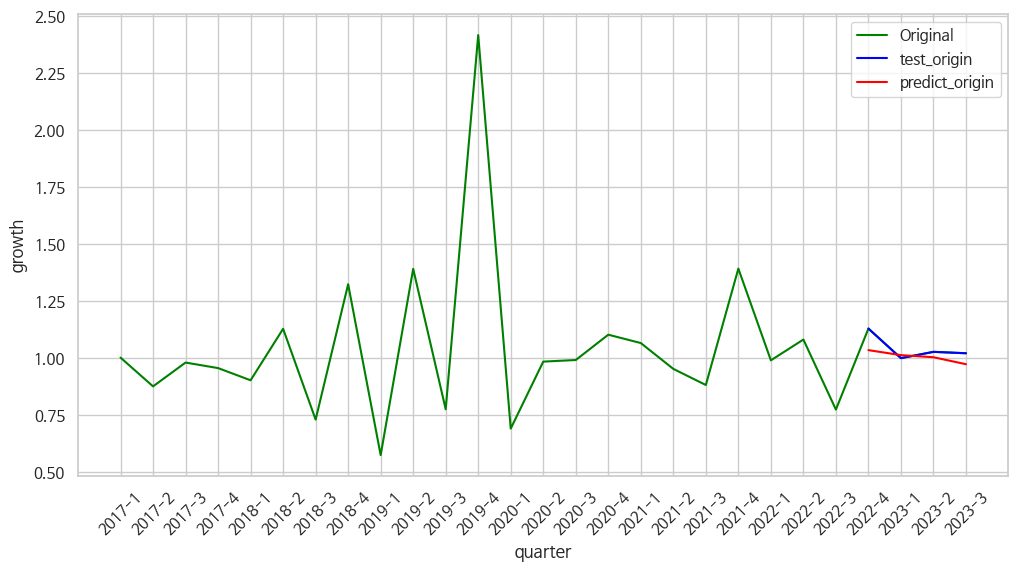

In [196]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_shoe['분기'], ap_shoe['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [197]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.038272
std      0.045301
min     -0.013349
25%      0.014382
50%      0.035888
75%      0.059777
max      0.094660
dtype: float64

In [198]:
### 23년 4분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 20ms/step
[[0.21597917]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9702402353286743 


###시장성

In [199]:
### X / y 데이터 생성
X = ap_shoe[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_shoe.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   4.417439e+09  1.000000  0.000000
1   3.859760e+09  0.873755 -1.694915
2   3.775910e+09  0.978276  0.000000
3   3.602383e+09  0.954044 -1.724138
4   3.243825e+09  0.900466  0.000000
5   3.653878e+09  1.126410  0.000000
6   2.659746e+09  0.727924  1.818182
7   3.516380e+09  1.322074 -1.851852
8   2.011709e+09  0.572097 -4.761905
9   2.795132e+09  1.389431 -2.439024
10  2.161734e+09  0.773392  0.000000
11  5.221736e+09  2.415532  2.000000
12  3.594755e+09  0.688421  2.040816
13  3.531665e+09  0.982449  0.000000
14  3.494404e+09  0.989449  3.846154
15  3.845897e+09  1.100587 -1.960784
16  4.091791e+09  1.063937  0.000000
17  3.889314e+09  0.950516  0.000000
18  3.421784e+09  0.879791 -2.000000
19  4.758387e+09  1.390616 -2.040816
20  4.701959e+09  0.988141  2.564103
21  5.074672e+09  1.079267  0.000000
22  3.917089e+09  0.771890  0.000000
23  4.416492e+09  1.127493  0.000000
24  3.417395e+09  0.997509 -0.166028
25  3.439841e+09  1.025304 -0.067253
2

In [200]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [201]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.4448972  0.2458494  0.54537874]
 [0.41050593 0.24250852 0.50621074]]


In [202]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [203]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_29 (LSTM)              (None, 32)                12416     
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [204]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.4126
Epoch 1: val_loss improved from inf to 0.49526, saving model to stock_model.h5
1/1 [==============================] - 3s 3s/step - loss: 0.4126 - val_loss: 0.4953
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.4113
Epoch 2: val_loss improved from 0.49526 to 0.49362, saving model to stock_model.h5
1/1 [==============================] - 0s 75ms/step - loss: 0.4113 - val_loss: 0.4936
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.4100
Epoch 3: val_loss improved from 0.49362 to 0.49198, saving model to stock_model.h5
1/1 [==============================] - 0s 93ms/step - loss: 0.4100 - val_loss: 0.4920
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.4086
Epoch 4: val_loss improved from 0.49198 to 0.49035, saving model to stock_model.h5
1/1 [==============================] - 0s 94ms/step - loss: 0.4086 - val_loss: 0.4904
Epoch 5/300
1/1 [=================

In [205]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 607ms/step
[[0.6621559 ]
 [0.60170233]
 [0.618208  ]
 [0.55217105]]


In [206]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_shoe.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.647330,0.662156
2023-1,0.576951,0.601702
2023-2,0.630266,0.618208
2023-3,0.552171,0.552171


In [207]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_shoe.iloc[-len(pred):, 5].values       # 시장성이 ap_shoe의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.647330,0.662156,2.393332e+07,25028070.0,-1.094752e+06
2023-1,0.576951,0.601702,1.873652e+07,20564144.0,-1.827620e+06
2023-2,0.630266,0.618208,2.267328e+07,21782930.0,8.903460e+05
2023-3,0.552171,0.552171,1.690673e+07,16906726.0,4.000000e+00


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


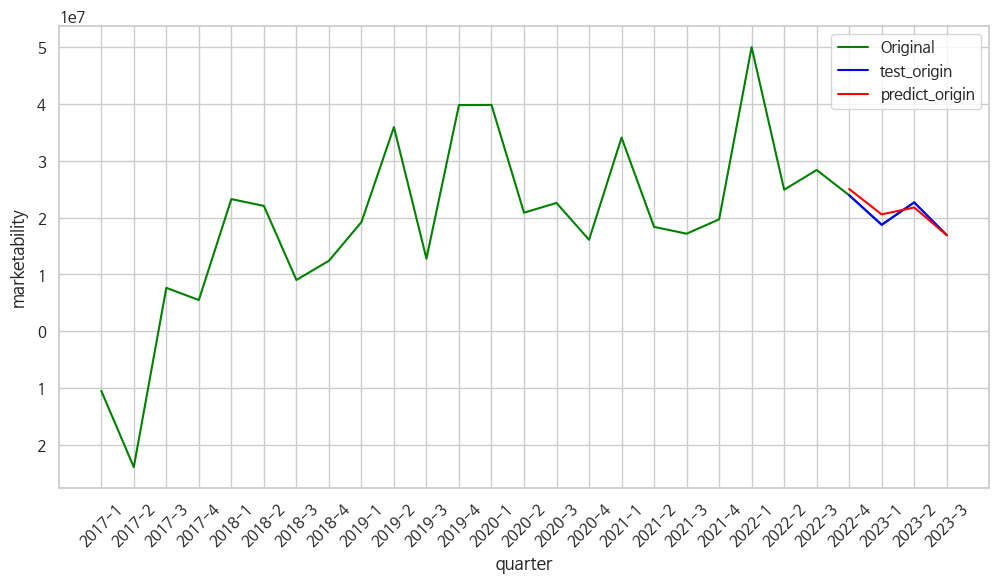

In [208]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_shoe['분기'], ap_shoe['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [209]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -5.080055e+05
std      1.197096e+06
min     -1.827620e+06
25%     -1.277969e+06
50%     -5.473740e+05
75%      2.225895e+05
max      8.903460e+05
dtype: float64

In [210]:
### 23년 4분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 23ms/step
[[0.55012363]]
--------------------------------------------------------------------------------
예측된 시장성  : 16755543.0 


### 순점포증감률

In [211]:
### X / y 데이터 생성
X = ap_shoe[['분기당_매출_금액', '성장성', '시장성']]
y = ap_shoe.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   4.417439e+09  1.000000 -1.045485e+07
1   3.859760e+09  0.873755 -2.386589e+07
2   3.775910e+09  0.978276  7.650534e+06
3   3.602383e+09  0.954044  5.506402e+06
4   3.243825e+09  0.900466  2.325254e+07
5   3.653878e+09  1.126410  2.206104e+07
6   2.659746e+09  0.727924  9.030498e+06
7   3.516380e+09  1.322074  1.240805e+07
8   2.011709e+09  0.572097  1.920718e+07
9   2.795132e+09  1.389431  3.590948e+07
10  2.161734e+09  0.773392  1.278520e+07
11  5.221736e+09  2.415532  3.978462e+07
12  3.594755e+09  0.688421  3.980820e+07
13  3.531665e+09  0.982449  2.086987e+07
14  3.494404e+09  0.989449  2.257633e+07
15  3.845897e+09  1.100587  1.609890e+07
16  4.091791e+09  1.063937  3.406786e+07
17  3.889314e+09  0.950516  1.836930e+07
18  3.421784e+09  0.879791  1.716964e+07
19  4.758387e+09  1.390616  1.969110e+07
20  4.701959e+09  0.988141  4.997466e+07
21  5.074672e+09  1.079267  2.490124e+07
22  3.917089e+09  0.771890  2.837072e+07
23  4.416492e+09

In [212]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [213]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.4448972  0.2458494  0.63026568]
 [0.41050593 0.24250852 0.55217112]]


In [214]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [215]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_31 (LSTM)              (None, 32)                12416     
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [216]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.3263
Epoch 1: val_loss improved from inf to 0.38410, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.3263 - val_loss: 0.3841
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.3252
Epoch 2: val_loss improved from 0.38410 to 0.38265, saving model to stock_model.h5
1/1 [==============================] - 0s 82ms/step - loss: 0.3252 - val_loss: 0.3827
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.3240
Epoch 3: val_loss improved from 0.38265 to 0.38120, saving model to stock_model.h5
1/1 [==============================] - 0s 86ms/step - loss: 0.3240 - val_loss: 0.3812
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.3228
Epoch 4: val_loss improved from 0.38120 to 0.37976, saving model to stock_model.h5
1/1 [==============================] - 0s 81ms/step - loss: 0.3228 - val_loss: 0.3798
Epoch 5/300
1/1 [=================

In [217]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 644ms/step
[[0.5949451 ]
 [0.5542819 ]
 [0.5432446 ]
 [0.48536617]]


In [218]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_shoe.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.553191,0.594945
2023-1,0.533904,0.554282
2023-2,0.545379,0.543245
2023-3,0.506211,0.485366


In [219]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_shoe.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_shoe의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.553191,0.594945,0.000000,0.359417,-0.359417
2023-1,0.533904,0.554282,-0.166028,0.009386,-0.175414
2023-2,0.545379,0.543245,-0.067253,-0.085623,0.018371
2023-3,0.506211,0.485366,-0.404413,-0.583844,0.179431


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


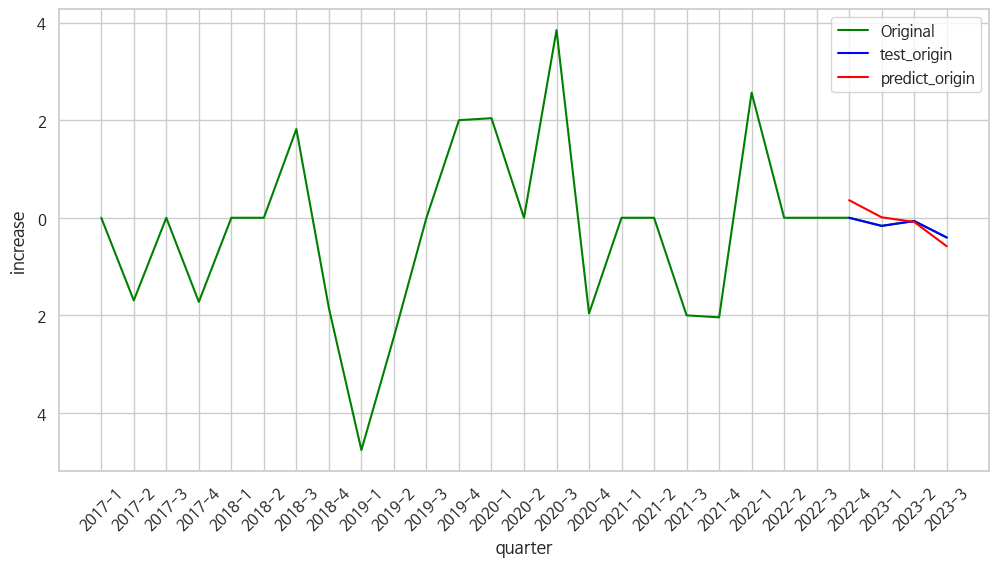

In [220]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_shoe['분기'], ap_shoe['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [221]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -0.084257
std      0.233871
min     -0.359417
25%     -0.221415
50%     -0.078522
75%      0.058636
max      0.179431
dtype: float64

In [222]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 21ms/step
[[0.4886606]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -0.5554856657981873 


### 추가

In [223]:
ap_shoe.loc[27] = ['2023-4', '신발', sales, growth, increase, marketability]

<ipython-input-223-87a75fca2336>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_shoe.loc[27] = ['2023-4', '신발', sales, growth, increase, marketability]


In [224]:
final_ap_shoe = ap_shoe
final_ap_shoe

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,신발,4.417439e+09,1.000000,0.000000,-1.045485e+07
1,2017-2,신발,3.859760e+09,0.873755,-1.694915,-2.386589e+07
2,2017-3,신발,3.775910e+09,0.978276,0.000000,7.650534e+06
3,2017-4,신발,3.602383e+09,0.954044,-1.724138,5.506402e+06
4,2018-1,신발,3.243825e+09,0.900466,0.000000,2.325254e+07
5,2018-2,신발,3.653878e+09,1.126410,0.000000,2.206104e+07
6,2018-3,신발,2.659746e+09,0.727924,1.818182,9.030498e+06
7,2018-4,신발,3.516380e+09,1.322074,-1.851852,1.240805e+07
8,2019-1,신발,2.011709e+09,0.572097,-4.761905,1.920718e+07
9,2019-2,신발,2.795132e+09,1.389431,-2.439024,3.590948e+07


## 최종결과

In [225]:
### X / y 데이터 생성
X = ap_shoe[['성장성', '시장성', '순점포증감률']]
y = ap_shoe.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -1.045485e+07  0.000000
1   0.873755 -2.386589e+07 -1.694915
2   0.978276  7.650534e+06  0.000000
3   0.954044  5.506402e+06 -1.724138
4   0.900466  2.325254e+07  0.000000
5   1.126410  2.206104e+07  0.000000
6   0.727924  9.030498e+06  1.818182
7   1.322074  1.240805e+07 -1.851852
8   0.572097  1.920718e+07 -4.761905
9   1.389431  3.590948e+07 -2.439024
10  0.773392  1.278520e+07  0.000000
11  2.415532  3.978462e+07  2.000000
12  0.688421  3.980820e+07  2.040816
13  0.982449  2.086987e+07  0.000000
14  0.989449  2.257633e+07  3.846154
15  1.100587  1.609890e+07 -1.960784
16  1.063937  3.406786e+07  0.000000
17  0.950516  1.836930e+07  0.000000
18  0.879791  1.716964e+07 -2.000000
19  1.390616  1.969110e+07 -2.040816
20  0.988141  4.997466e+07  2.564103
21  1.079267  2.490124e+07  0.000000
22  0.771890  2.837072e+07  0.000000
23  1.127493  2.393332e+07  0.000000
24  0.997509  1.873652e+07 -0.166028
25  1.025304  2.267328e+07 -0.067253
2

In [226]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (28, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (28, 1)


In [227]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (26, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (26, 1)
[[0.24250852 0.55217112 0.50621074]
 [0.21597917 0.55012364 0.4886606 ]]


In [228]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (22, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (22, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [229]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_33 (LSTM)              (None, 32)                12416     
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [230]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2519
Epoch 1: val_loss improved from inf to 0.55060, saving model to stock_model.h5
1/1 [==============================] - 3s 3s/step - loss: 0.2519 - val_loss: 0.5506
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2509
Epoch 2: val_loss improved from 0.55060 to 0.54880, saving model to stock_model.h5
1/1 [==============================] - 0s 79ms/step - loss: 0.2509 - val_loss: 0.5488
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2499
Epoch 3: val_loss improved from 0.54880 to 0.54700, saving model to stock_model.h5
1/1 [==============================] - 0s 78ms/step - loss: 0.2499 - val_loss: 0.5470
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2489
Epoch 4: val_loss improved from 0.54700 to 0.54521, saving model to stock_model.h5
1/1 [==============================] - 0s 89ms/step - loss: 0.2489 - val_loss: 0.5452
Epoch 5/300
1/1 [=================

In [231]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 614ms/step
[[0.42039376]
 [0.42442957]
 [0.4115087 ]
 [0.41313216]]


In [232]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_shoe.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2023-1,0.437905,0.420394
2023-2,0.444897,0.424430
2023-3,0.410506,0.411509
2023-4,0.412124,0.413132


In [233]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_shoe.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_shoe의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2023-1,0.437905,0.420394,3.417395e+09,3.361185e+09,56210944.0
2023-2,0.444897,0.424430,3.439841e+09,3.374140e+09,65701632.0
2023-3,0.410506,0.411509,3.329444e+09,3.332663e+09,-3218944.0
2023-4,0.412124,0.413132,3.334640e+09,3.337874e+09,-3234560.0


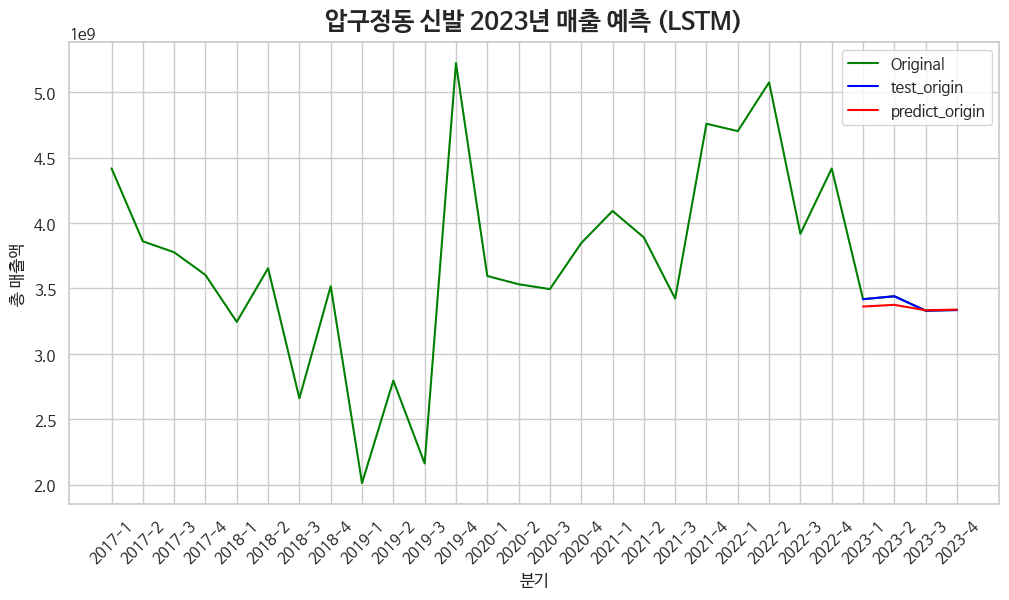

In [234]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.title('압구정동 신발 2023년 매출 예측 (LSTM)', fontsize = 18, fontweight='bold', pad =10)


plt.plot(ap_shoe['분기'], ap_shoe['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('분기')
plt.ylabel('총 매출액')
plt.legend()
plt.show()